# Load Packages

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install scanpy
!pip install matplotlib==3.1.3

import numpy as np 
import pandas as pd 
import scanpy as sc
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import scipy.stats

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.0 MB 14.7 MB/s 
     |████████████████████████████████| 96 kB 5.2 MB/s 
     |████████████████████████████████| 11.2 MB 52.5 MB/s 
     |████████████████████████████████| 88 kB 7.3 MB/s 
     |████████████████████████████████| 960 kB 66.8 MB/s 
     |████████████████████████████████| 1.1 MB 73.3 MB/s 
     |████████████████████████████████| 63 kB 2.2 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=1b93a1a132d2e7085a5ba222fadf12f4126c47e963ec1eed4d4cf6df9e73261a
  Stored in directory: /root/.cache/pip/wheels/b3/52/a5/1fd9e3e76a7ab34f134c07469cd6f16e27ef3a37aeff1fe821
  Created wheel for pynndescent: filename=pynndescent-0.5.7-py3-none-any.whl size=54286 sha256=17437b35dba8a22d4beef3c39d843b545005062284b8bf5bf2f09ecf6ff6f6b9
  Stored in directory: /root/.cache/pip/wheels/7f/2a/f8/7bd5dcec71bd5c669f6

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 13.1 MB 15.4 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.3
    Uninstalling matplotlib-3.5.3:
      Successfully uninstalled matplotlib-3.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scanpy 1.9.1 requires matplotlib>=3.4, but you have matplotlib 3.1.3 which is incompatible.


In [ ]:
!pip uninstall matplotlib
!pip install matplotlib==3.1.3

Found existing installation: matplotlib 3.1.3
Uninstalling matplotlib-3.1.3:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/matplotlib-3.1.3-py3.7-nspkg.pth
    /usr/local/lib/python3.7/dist-packages/matplotlib-3.1.3.dist-info/*
    /usr/local/lib/python3.7/dist-packages/matplotlib/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axes_grid/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axes_grid1/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axisartist/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/tests/*
    /usr/local/lib/python3.7/dist-packages/pylab.py
Proceed (y/n)? y
  Successfully uninstalled matplotlib-3.1.3
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached matplotlib-3.1.3-cp37-cp37m-manylinux1_x86_64.whl (13.1 MB)
ERROR: pip's dependency resolver does not currently take into account all the pa

# Setting figure parameters

In [ ]:
sc.set_figure_params(dpi=100, color_map = 'viridis_r')
sc.settings.verbosity = 1
sc.logging.print_header()

scanpy==1.9.1 anndata==0.8.0 umap==0.5.3 numpy==1.21.6 scipy==1.7.3 pandas==1.3.5 scikit-learn==1.0.2 statsmodels==0.12.2 pynndescent==0.5.7


# Upload Datasets

In [ ]:
Pancreas_adata = sc.read_text("/content/drive/My Drive/ML for genomics project group /Data/Pancreas Data/Processed/Pancreas_LogX_CellCycleRegressedOut.txt", delimiter = '\t', first_column_names=None)
sc.pp.scale(Pancreas_adata)
Pancreas_adata

PancreasMetadata = pd.read_csv("/content/drive/My Drive/ML for genomics project group /Data/Pancreas Data/Processed/PancreasMetadata.csv")
Pancreas_adata.obs['Cell Type'] = PancreasMetadata['Cell type'].values
print(Pancreas_adata.obs['Cell Type'].unique())

PancreasCellID = []
for item in PancreasMetadata['Cell ID'].values:
  PancreasCellID.append(item)
Pancreas_adata.obs_names = PancreasCellID
print(Pancreas_adata.obs_names)

PancreasGenes = pd.read_csv("/content/drive/My Drive/ML for genomics project group /Data/Pancreas Data/Processed/Pancreas_Genelist.txt",header=None)
PancreasGenelist = []
for item in PancreasGenes.values.tolist():
  PancreasGenelist.append(item[0])
Pancreas_adata.var_names = PancreasGenelist

# Exclude cells with cell type assignments that are not well-defined 
# i.e. unclassified exocrine, unclassified endocrine, co-expression, MHC
# Pancreas_adata = Pancreas_adata[np.asarray(np.where(Pancreas_adata.obs['Cell Type'] != 'unclassified exocrine'))[0,:],:]
# Pancreas_adata = Pancreas_adata[np.asarray(np.where(Pancreas_adata.obs['Cell Type'] != 'unclassified endocrine'))[0,:],:]
# Pancreas_adata = Pancreas_adata[np.asarray(np.where(Pancreas_adata.obs['Cell Type'] != 'co-expression'))[0,:],:]
# Pancreas_adata = Pancreas_adata[np.asarray(np.where(Pancreas_adata.obs['Cell Type'] != 'MHC'))[0,:],:]

print(Pancreas_adata.shape)

['γ' 'α' 'β' 'acinar' 'ε' 'unclassified exocrine' 'ductal' 'δ'
 'unclassified endocrine' 'endothelial' 'co-expression' 'PSC' 'mast' 'MHC']
Index(['HP1502401_H13', 'HP1502401_J14', 'HP1502401_B14', 'HP1502401_A14',
       'HP1502401_C14', 'HP1502401_G14', 'HP1502401_E14', 'HP1502401_L14',
       'HP1502401_M14', 'HP1502401_K14',
       ...
       'HP1526901T2D_M7', 'HP1526901T2D_N16', 'HP1526901T2D_C8',
       'HP1526901T2D_H2', 'HP1526901T2D_I16', 'HP1526901T2D_F7',
       'HP1525301T2D_K3', 'HP1525301T2D_J10', 'HP1526901T2D_N8',
       'HP1526901T2D_A8'],
      dtype='object', length=2209)
(2209, 26179)


In [ ]:
# Read and process GBM data 

GBM_adata = sc.read_text("/content/drive/My Drive/ML for genomics project group /Data/GBM Data/Processed/GBM_Processed.txt", delimiter = '\t', first_column_names=None)

GBM_Metadata = pd.read_csv("/content/drive/My Drive/ML for genomics project group /Data/GBM Data/Processed/metadata2.csv")
GBM_adata.obs['Cell Type'] = GBM_Metadata['cell_assignment'].values

GBMGenes = pd.read_csv("/content/drive/My Drive/ML for genomics project group /Data/GBM Data/Processed/features2.tsv",header=None)
GBMGenelist = []
for item in GBMGenes.values.tolist():
  GBMGenelist.append(item[0])
GBM_adata.var_names = GBMGenelist
GBM_adata.var_names

print(pd.unique(GBM_adata.obs['Cell Type']))

['Macrophage' 'Malignant' 'Oligodendrocyte' 'T-cell']


In [ ]:
# Read and process CellTypist data

adata_2000 = sc.read('celltypist_demo_folder/demo_2000_cells.h5ad', 
                     backup_url = 'https://celltypist.cog.sanger.ac.uk/Notebook_demo_data/demo_2000_cells.h5ad')
adata_2000.X = adata_2000.X.toarray()

# Regress out cell cycle scores
CT_CellCycleScores = pd.read_table("/content/drive/MyDrive/ML for genomics project group /Data/CellTypist Data/CellCycleScore.csv",
                                   delimiter=',')
adata_2000.obs['score_S'] = CT_CellCycleScores['score_S'].values
adata_2000.obs['score_G2M'] = CT_CellCycleScores['score_G2M'].values
sc.pp.regress_out(adata_2000, ['score_S', 'score_G2M'])

# Scale (zero-center) data
sc.pp.scale(adata_2000)

adata_2000

  0%|          | 0.00/34.1M [00:00<?, ?B/s]

AnnData object with n_obs × n_vars = 2000 × 18950
    obs: 'cell_type', 'score_S', 'score_G2M'
    var: 'mean', 'std'

In [ ]:
PBMC_adata_original = sc.read_text("/content/drive/MyDrive/ML for genomics project group /Data/PBMC Data/matrix.txt", delimiter = '\t', first_column_names=None)
PBMC_adata_original = PBMC_adata_original.T

# Load gene list 
PBMC_Genes = pd.read_csv("/content/drive/MyDrive/ML for genomics project group /Data/PBMC Data/features.txt")
PBMC_Genelist = []
for item in PBMC_Genes.values:
  PBMC_Genelist.append(item[0])
PBMC_adata_original.var_names = PBMC_Genelist

PBMC_Truth = pd.read_csv("/content/drive/MyDrive/ML for genomics project group /Data/PBMC Data/Ground_Truth_PBMC3k.csv")
PBMC_adata_original.obs['Cell Type'] = PBMC_Truth['orig_id'].values

PBMC_adata = PBMC_adata_original 
sc.pp.scale(PBMC_adata)

In [ ]:
#@title
SceFollicula_adata = sc.read_h5ad("/content/drive/MyDrive/ML for genomics project group /Data/CellAssign Data /Source Data/sce_follicular_annotated_final.h5ad")

# Subsetting the cell barcodes 
SceFollicula_adata.obs = SceFollicula_adata.obs[['Sample']]
SceFollicula_adata.obs.drop(['Sample'], axis=1, inplace=True)

# Subsetting the gene name IDs 
SceFollicula_adata.var = SceFollicula_adata.var[['ID']]
SceFollicula_adata.var.set_index('ID', inplace=True)

# Load gene list 
FollicularLymphomaGenes = pd.read_table("/content/drive/MyDrive/ML for genomics project group /Data/CellAssign Data /Gene_Name.txt")
FollicularLymphomaGenelist = []
for item in FollicularLymphomaGenes.values.tolist():
  FollicularLymphomaGenelist.append(item[0])
SceFollicula_adata.var_names = FollicularLymphomaGenelist

# Load ground truth cell type labels 
SceFollicula_GroundTruth = pd.read_csv("/content/drive/MyDrive/ML for genomics project group /Data/CellAssign Data /GroundTruth_FollicularLymphoma.csv")
SceFollicula_adata.obs['Cell Type'] = SceFollicula_GroundTruth['x'].values

# Pre-process: log1p > regress out cell cycle score > HVG > scale
sc.pp.log1p(SceFollicula_adata)

# Regress out cell cycle scores
FL_CellCycleScores = pd.read_table("/content/drive/MyDrive/ML for genomics project group /Data/CellAssign Data /CellCycleScore.csv", delimiter = ',')
SceFollicula_adata.obs['score_S'] = FL_CellCycleScores['score_S'].values
SceFollicula_adata.obs['score_G2M'] = FL_CellCycleScores['score_G2M'].values
sc.pp.regress_out(SceFollicula_adata, ['score_S', 'score_G2M'])

sc.pp.highly_variable_genes(SceFollicula_adata)
sc.pp.scale(SceFollicula_adata)
SceFollicula_adata

/usr/local/lib/python3.7/dist-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/usr/local/lib/python3.7/dist-packages/anndata/_core/anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/usr/local/lib/python3.7/dist-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


AnnData object with n_obs × n_vars = 9156 × 33694
    obs: 'Cell Type', 'score_S', 'score_G2M'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log.exprs.offset', 'log1p', 'hvg'
    obsm: 'X_pca', 'X_tsne', 'X_umap'
    layers: 'logcounts'

# scCATCH: Pancreas Data

In [ ]:
# scCATCH_Pancreas_Predictions = pd.read_csv("/content/drive/My Drive/ML4FG 2022/Data/Pancreas Data/Processed/scCATCH_predictions.txt", delimiter = '\t')
scCATCH_Pancreas_Predictions = pd.read_csv("/content/drive/My Drive/ML for genomics project group /Data/Pancreas Data/Processed/UpdatedDf.txt", delimiter = '\t')
scCATCH_Pancreas_Predictions

,ID,Cell_Type
0,HP1502401,11
1,HP1502401,5
2,HP1502401,7
3,HP1502401,2
4,HP1502401,5
...,...,...
2117,HP1526901T2D,10
2118,HP1525301T2D,3
2119,HP1525301T2D,10
2120,HP1526901T2D,3


In [ ]:
scCATCH_Predictions = []
for i in scCATCH_Pancreas_Predictions['Cell_Type'].values:
  if i == 3:
    scCATCH_Predictions.append('α')
  elif i in [9,12]:
    scCATCH_Predictions.append('β')
  elif i == 10:
    scCATCH_Predictions.append('δ')
  elif i == 8: 
    scCATCH_Predictions.append('γ')
  else:
    scCATCH_Predictions.append('unknown')

Pancreas_adata.obs['scCATCH Pancreas Predictions'] = scCATCH_Predictions

ValueError: ignored

In [ ]:
sc.tl.pca(Pancreas_adata, svd_solver='arpack', use_highly_variable=False)
sc.pp.neighbors(Pancreas_adata, n_neighbors=10, n_pcs=40)
sc.tl.umap(Pancreas_adata)

In [ ]:
sc.pl.umap(Pancreas_adata, color = ['scCATCH Pancreas Predictions'])
sc.pl.umap(Pancreas_adata, color = ['Cell Type'])

In [ ]:
# Evaluate Performance using % Accuracy 

# Overall: 
CorrectPred = 0
i = 0
for pred in Pancreas_adata.obs['Cell Type'].values: 
  if pred == Pancreas_adata.obs['scCATCH Pancreas Predictions'].values[i]:
    CorrectPred += 1
  i += 1

print('scCATCH % Accuracy Performance: Pancreas Data')
print('Overall = ' + str(CorrectPred / Pancreas_adata.shape[0]))

# Cell Type Subpopulations 
CellTypeAccs = []
for CellType in pd.unique(Pancreas_adata.obs['Cell Type']):
    CorrectPred = 0
    i = 0
    for pred in Pancreas_adata.obs['Cell Type'].values: 
      if (pred == Pancreas_adata.obs['scCATCH Pancreas Predictions'].values[i]) & (pred == CellType):
        CorrectPred += 1
      i += 1

    CellTypeAccs.append(CorrectPred / len(np.where(Pancreas_adata.obs['Cell Type'] == CellType)[0]))
    print(CellType + ' = ' + str(CorrectPred / len(np.where(Pancreas_adata.obs['Cell Type'] == CellType)[0])))

In [ ]:
PancreasMarkerGeneQuality = pd.read_csv("/content/drive/My Drive/ML for genomics project group /Data/Pancreas Data/Processed/Pancreas_MarkerGeneQuality.csv", index_col=0)
PancreasMarkerGeneQuality

In [ ]:
Pancreas_pVal_ordered = []
Pancreas_CellType_ordered = []
Pancreas_Accs_ordered = []

for i in pd.unique(Pancreas_adata.obs['Cell Type']):
  if len(np.where(PancreasMarkerGeneQuality['cell_type'] == i)[0]) > 0: 
    Pancreas_Accs_ordered.append(CellTypeAccs[np.where(PancreasMarkerGeneQuality['cell_type'] == i)[0][0]])
    Pancreas_CellType_ordered.append(i)
    Pancreas_pVal_ordered.append(PancreasMarkerGeneQuality.iloc[np.where(PancreasMarkerGeneQuality['cell_type'] == i)[0][0],1])

plt.plot(Pancreas_Accs_ordered, Pancreas_pVal_ordered, 'o')
plt.xlabel('% Accuracy'); plt.ylabel('Marker Genes Expression P-Value')
plt.show()
Pancreas_Results = scipy.stats.linregress(Pancreas_Accs_ordered, Pancreas_pVal_ordered)
# print("scCATCH: R-value correlation between marker gene quality and model performance = " + str(Pancreas_Results.rvalue))
print("LinReg P-Value = " + str(Pancreas_Results.pvalue))
print("LinReg R = " + str(Pancreas_Results.rvalue))

# scCATCH: GBM Data 

In [ ]:
scCATCH_GBM_Predictions = pd.read_csv("/content/drive/My Drive/ML for genomics project group /Data/GBM Data/Processed/scCATCH_GBM_predictions.txt", delimiter = '\t')
scCATCH_GBM_Predictions

,ID,Cell_Type
0,SeuratProject,15
1,SeuratProject,8
2,SeuratProject,11
3,SeuratProject,8
4,SeuratProject,11
...,...,...
7925,SeuratProject,0
7926,SeuratProject,0
7927,SeuratProject,2
7928,SeuratProject,0


In [ ]:
scCATCH_Predictions = []
for i in scCATCH_GBM_Predictions['Cell_Type'].values:
  if i in [11,15]:
    scCATCH_Predictions.append('Macrophage')
  elif i == 8:
    scCATCH_Predictions.append('Microglial')
  elif i in [0,3,9,12]:
    scCATCH_Predictions.append('Astrocyte')
  elif i == 13: 
    scCATCH_Predictions.append('Pericyte')
  elif i in [4,7,10,14]:
    scCATCH_Predictions.append('Oligodendrocyte')
  elif i == 16:
    scCATCH_Predictions.append('T-cell')
  else: 
    scCATCH_Predictions.append('Unknown')

GBM_adata.obs['scCATCH GBM Predictions'] = scCATCH_Predictions

In [ ]:
sc.tl.pca(GBM_adata, svd_solver='arpack', use_highly_variable=False)
sc.pp.neighbors(GBM_adata, n_neighbors=10, n_pcs=40)
sc.tl.umap(GBM_adata)

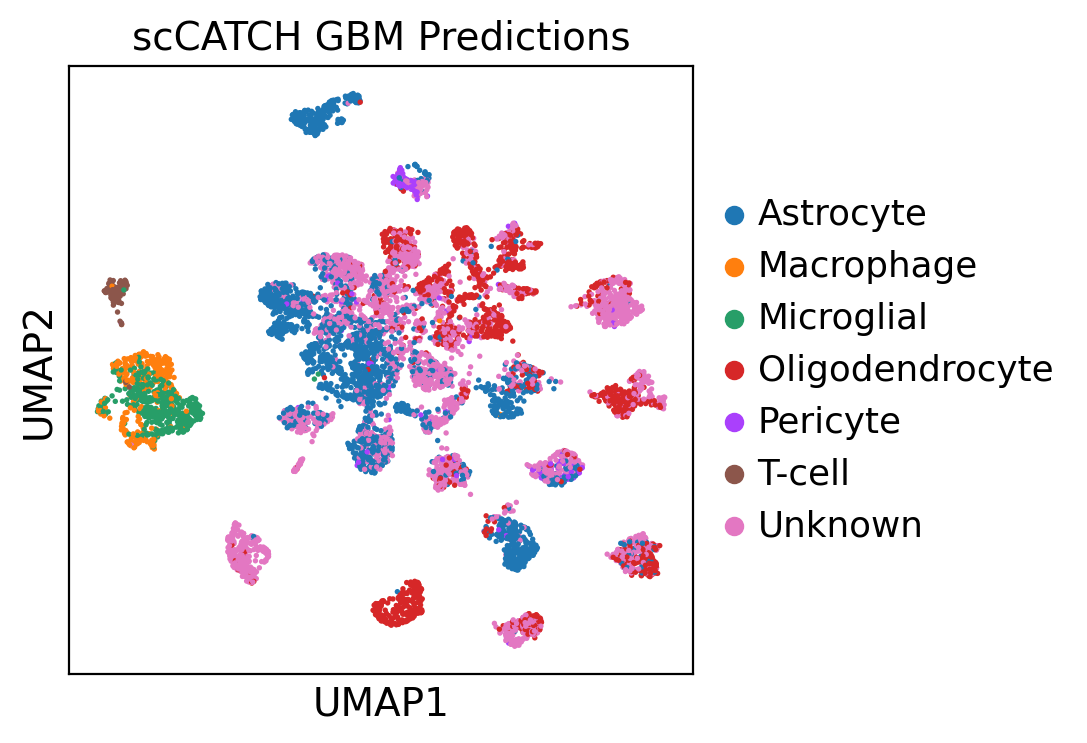

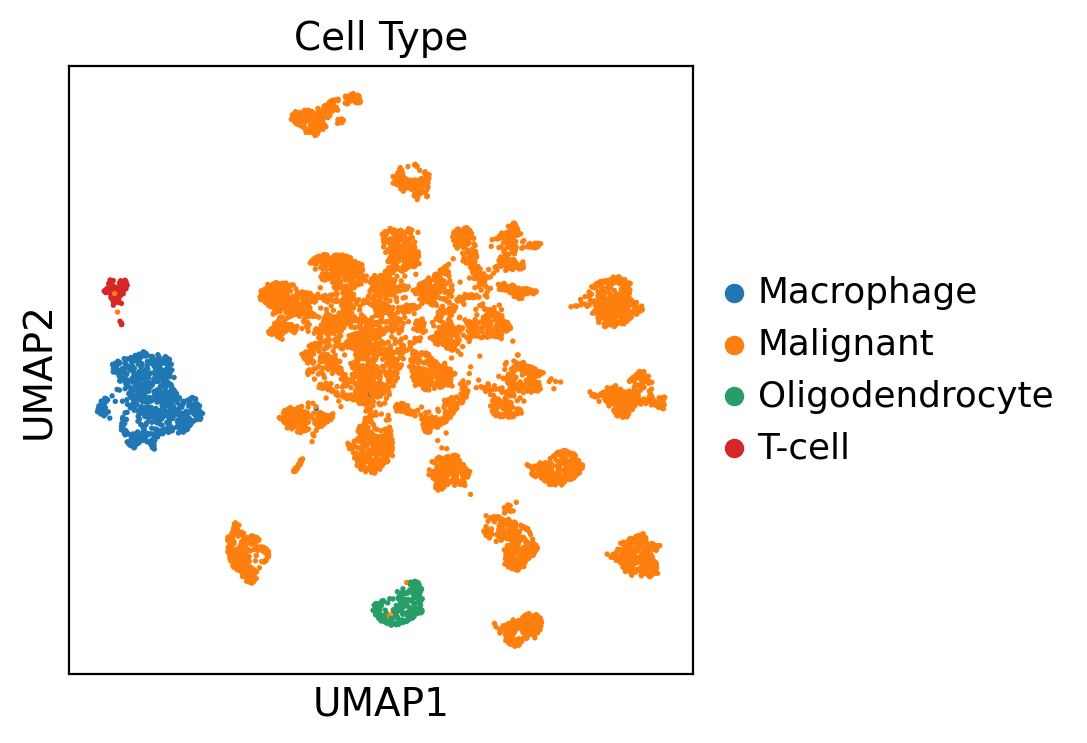

In [ ]:
sc.pl.umap(GBM_adata, color = ['scCATCH GBM Predictions'])
sc.pl.umap(GBM_adata, color = ['Cell Type'])

In [ ]:
CorrectPred = 0
i = 0
for pred in GBM_adata.obs['Cell Type'].values: 
  if pred == GBM_adata.obs['scCATCH GBM Predictions'].values[i]:
    CorrectPred += 1
  i += 1

print('scCATCH % Accuracy Performance: GBM Data')
print('Overall = ' + str(CorrectPred / GBM_adata.shape[0]))

# Cell Type Subpopulations 
CellTypeAccs = []
for CellType in pd.unique(GBM_adata.obs['Cell Type']):
    CorrectPred = 0
    i = 0
    for pred in GBM_adata.obs['Cell Type'].values: 
      if (pred == GBM_adata.obs['scCATCH GBM Predictions'].values[i]) & (pred == CellType):
        CorrectPred += 1
      i += 1

    CellTypeAccs.append(CorrectPred / len(np.where(GBM_adata.obs['Cell Type'] == CellType)[0]))
    print(CellType + ' = ' + str(CorrectPred / len(np.where(GBM_adata.obs['Cell Type'] == CellType)[0])))

scCATCH % Accuracy Performance: GBM Data
Overall = 0.07793190416141235
Macrophage = 0.41114058355437666
Malignant = 0.0
Oligodendrocyte = 0.9954337899543378
T-cell = 0.9574468085106383


In [ ]:
GBMMarkerGeneQuality = pd.read_csv("/content/drive/My Drive/ML for genomics project group /Data/GBM Data/Processed/GBMMarkerGeneQuality.csv", index_col=0)
GBMMarkerGeneQuality

,cell_type,p_value
0,Macrophage,1.164640e-36
1,Oligodendrocyte,8.055784e-22
2,T-cell,2.927678e-15
3,Malignant,4.521445e-01


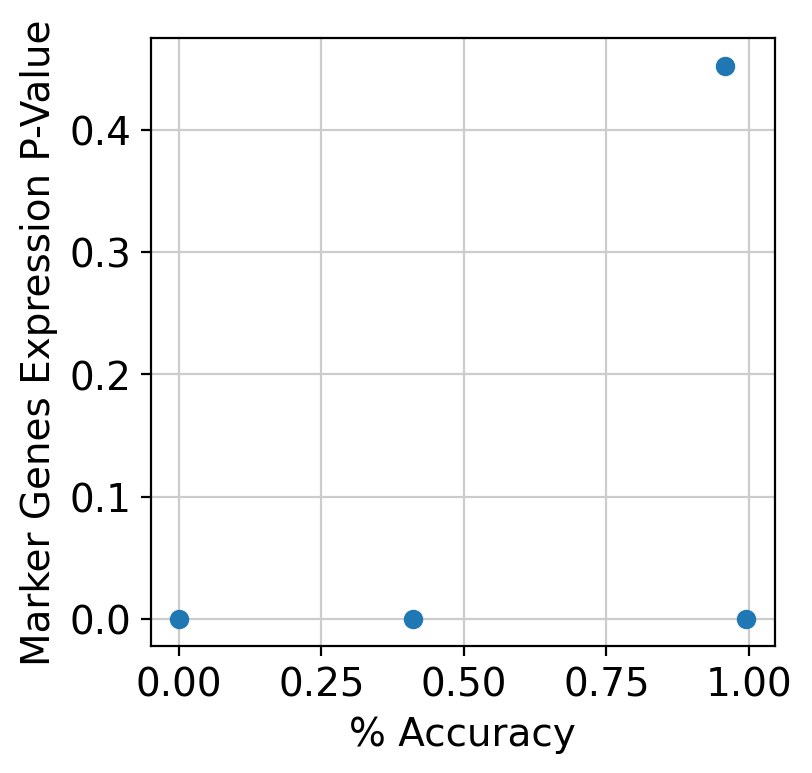

LinReg P-Value = 0.48668307885628104
LinReg R = 0.513316921143719
Correlation Coefficient = 0.513316921143719


In [ ]:
pVal_ordered = []
CellType_ordered = []
Accs_ordered = []

for i in pd.unique(GBM_adata.obs['Cell Type']):
  if len(np.where(GBMMarkerGeneQuality['cell_type'] == i)[0]) > 0: 
    Accs_ordered.append(CellTypeAccs[np.where(GBMMarkerGeneQuality['cell_type'] == i)[0][0]])
    CellType_ordered.append(i)
    pVal_ordered.append(GBMMarkerGeneQuality.iloc[np.where(GBMMarkerGeneQuality['cell_type'] == i)[0][0],1])

plt.plot(Accs_ordered, pVal_ordered, 'o')
plt.xlabel('% Accuracy'); plt.ylabel('Marker Genes Expression P-Value')
plt.show()
GBM_Results = scipy.stats.linregress(Accs_ordered, pVal_ordered)
# print("scCATCH: R-value correlation between marker gene quality and model performance = " + str(Pancreas_Results.rvalue))
print("LinReg P-Value = " + str(GBM_Results.pvalue))
print("LinReg R = " + str(GBM_Results.rvalue))
print("Correlation Coefficient = " + str(np.corrcoef(Accs_ordered, pVal_ordered)[0][1]))

# AE Model: Pancreas Data

In [ ]:
# scCATCH_Pancreas_Predictions = pd.read_csv("/content/drive/My Drive/ML4FG 2022/Data/Pancreas Data/Processed/scCATCH_predictions.txt", delimiter = '\t')
BiasedAE_Pancreas_Predictions = pd.read_csv("/content/drive/My Drive/ML for genomics project group /Data/Pancreas Data/Processed/sparseAE_pancreas_predictions.csv")
BiasedAE_Pancreas_Predictions

,Unnamed: 0,Cell Type,Predicted Cell Type,pVal
0,HP1502401_H13,γ,Gamma (PP) cells,0.0
1,HP1502401_J14,α,Alpha cells,0.0
2,HP1502401_B14,β,Beta cells,0.0
3,HP1502401_A14,acinar,Acinar cells,0.0
4,HP1502401_C14,α,Alpha cells,0.0
...,...,...,...,...
2204,HP1526901T2D_F7,γ,Gamma (PP) cells,0.0
2205,HP1525301T2D_K3,α,Alpha cells,0.0
2206,HP1525301T2D_J10,δ,Delta cells,0.0
2207,HP1526901T2D_N8,α,Alpha cells,0.0


In [ ]:
pd.unique(BiasedAE_Pancreas_Predictions['Predicted Cell Type'])

array(['Gamma (PP) cells', 'Alpha cells', 'Beta cells', 'Acinar cells',
       'Epsilon cells', 'Endothelial cells', 'Ductal cells',
       'Delta cells', 'Enteroendocrine cells',
       'Pancreatic stellate cells', 'Mast cells', 'MHC'], dtype=object)

In [ ]:
BiasedAE_Predictions = []
for i in BiasedAE_Pancreas_Predictions['Predicted Cell Type'].values:
  if i == 'Alpha cells':
    BiasedAE_Predictions.append('α')
  elif i == 'Beta cells':
    BiasedAE_Predictions.append('β')
  elif i == 'Delta cells':
    BiasedAE_Predictions.append('δ')
  elif i == 'Gamma (PP) cells': 
    BiasedAE_Predictions.append('γ')
  elif i == 'Acinar cells':
    BiasedAE_Predictions.append('acinar')
  elif i == 'Epsilon cells':
    BiasedAE_Predictions.append('ε')
  elif i == 'Ductal cells':
    BiasedAE_Predictions.append('ductal')
  elif i == 'Pancreatic stellate cells':
    BiasedAE_Predictions.append('PSC')
  elif i == 'Endothelial cells':
    BiasedAE_Predictions.append('endothelial')
  elif i == 'Mast cells':
    BiasedAE_Predictions.append('mast')
  elif i == 'Enteroendocrine cells':
    BiasedAE_Predictions.append('unclassified endocrine')
  else:
    BiasedAE_Predictions.append(i)

Pancreas_adata.obs['Model Pancreas Predictions'] = BiasedAE_Predictions

In [ ]:
CorrectPred = 0
i = 0
PancreasPredictionEval = []
for pred in Pancreas_adata.obs['Cell Type'].values: 
  if pred == Pancreas_adata.obs['Model Pancreas Predictions'].values[i]:
    CorrectPred += 1
    PancreasPredictionEval.append('Correct')
  else:
    PancreasPredictionEval.append('Incorrect')
  i += 1

Pancreas_adata.obs['Model Pancreas Evaluation'] = PancreasPredictionEval

print('VAE % Accuracy Performance: Pancreas Data')
print('Overall = ' + str(CorrectPred / Pancreas_adata.shape[0]))

# Cell Type Subpopulations 
CellTypeAccs = []
for CellType in pd.unique(Pancreas_adata.obs['Cell Type']):
    CorrectPred = 0
    i = 0
    for pred in Pancreas_adata.obs['Cell Type'].values: 
      if (pred == Pancreas_adata.obs['Model Pancreas Predictions'].values[i]) & (pred == CellType):
        CorrectPred += 1
      i += 1

    CellTypeAccs.append(CorrectPred / len(np.where(Pancreas_adata.obs['Cell Type'] == CellType)[0]))
    print(CellType + ' = ' + str(CorrectPred / len(np.where(Pancreas_adata.obs['Cell Type'] == CellType)[0])))

VAE % Accuracy Performance: Pancreas Data
Overall = 0.9497510185604345
γ = 0.9898477157360406
α = 0.9762979683972912
β = 0.9925925925925926
acinar = 0.9945945945945946
ε = 1.0
unclassified exocrine = 0.0
ductal = 0.9844559585492227
δ = 0.9912280701754386
unclassified endocrine = 0.24390243902439024
endothelial = 1.0
co-expression = 0.0
PSC = 0.9444444444444444
mast = 0.5714285714285714
MHC = 1.0


In [ ]:
sc.tl.pca(Pancreas_adata, svd_solver='arpack', use_highly_variable=False)
sc.pp.neighbors(Pancreas_adata)
sc.tl.umap(Pancreas_adata)

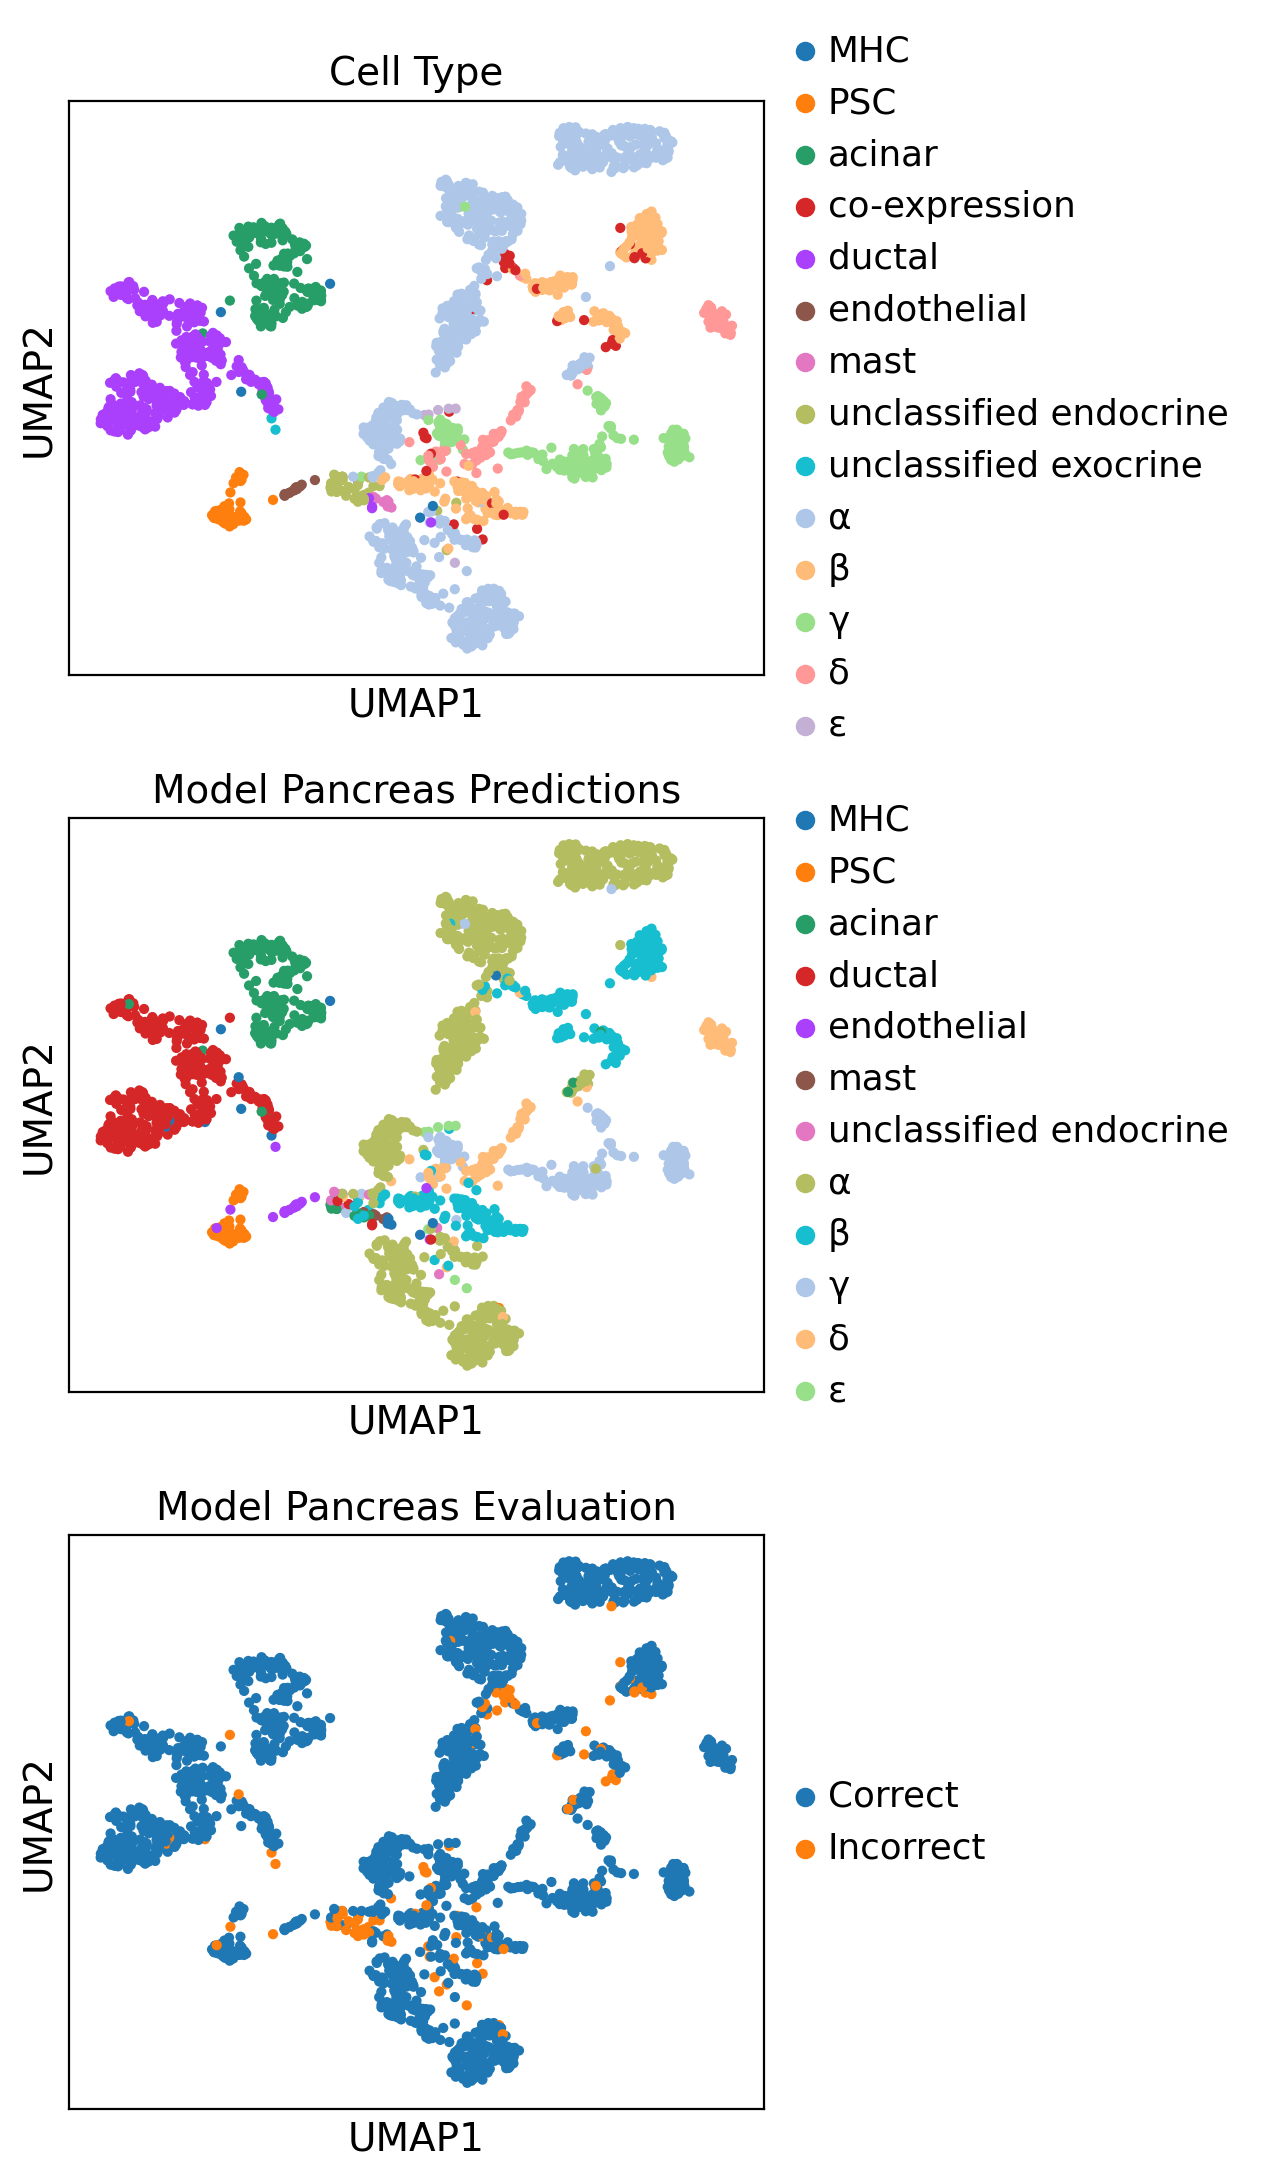

In [ ]:
sc.pl.umap(Pancreas_adata, 
           color = ['Cell Type','Model Pancreas Predictions','Model Pancreas Evaluation'],
           ncols = 1)

In [ ]:
# Compare average p-value in correct predictions vs incorrect predictions (t-test)
from scipy import stats
import statistics

stat, p_val = stats.ttest_ind(BiasedAE_Pancreas_Predictions['pVal'].iloc[np.where(Pancreas_adata.obs['Model Pancreas Evaluation'] == 'Correct')],
                              BiasedAE_Pancreas_Predictions['pVal'].iloc[np.where(Pancreas_adata.obs['Model Pancreas Evaluation'] == 'Incorrect')])
Correct_Mean_pVal = statistics.mean(BiasedAE_Pancreas_Predictions['pVal'].iloc[np.where(Pancreas_adata.obs['Model Pancreas Evaluation'] == 'Correct')])
Incorrect_Mean_pVal = statistics.mean(BiasedAE_Pancreas_Predictions['pVal'].iloc[np.where(Pancreas_adata.obs['Model Pancreas Evaluation'] == 'Incorrect')])

print('Mean Prediction Confidence in Correct Prediction = ' + str(Correct_Mean_pVal))
print('Mean Prediction Confidence in Incorrect Prediction = ' + str(Incorrect_Mean_pVal))
print('P-Value of the Statistical Difference in Average P-Value = ' + str(p_val))

Mean Prediction Confidence in Correct Prediction = 0.0004117994420516622
Mean Prediction Confidence in Incorrect Prediction = 0.0037479154006609147
P-Value of the Statistical Difference in Average P-Value = 0.021367142545985932


In [ ]:
PancreasMarkerGeneQuality = pd.read_csv("/content/drive/My Drive/ML for genomics project group /Data/Pancreas Data/Processed/Pancreas_MarkerGeneQuality.csv")
PancreasMarkerGeneQuality

,Unnamed: 0,cell_type,p_value
0,0,endothelial,4.175832e-21
1,1,α,7.812090e-27
2,2,β,4.639849e-14
3,3,MHC,4.963193e-30
4,4,mast,2.493446e-04
5,5,PSC,4.122050e-17
6,6,unclassified endocrine,7.827552e-05
7,7,acinar,2.021856e-41
8,8,ε,1.887855e-15
9,9,ductal,2.431933e-33


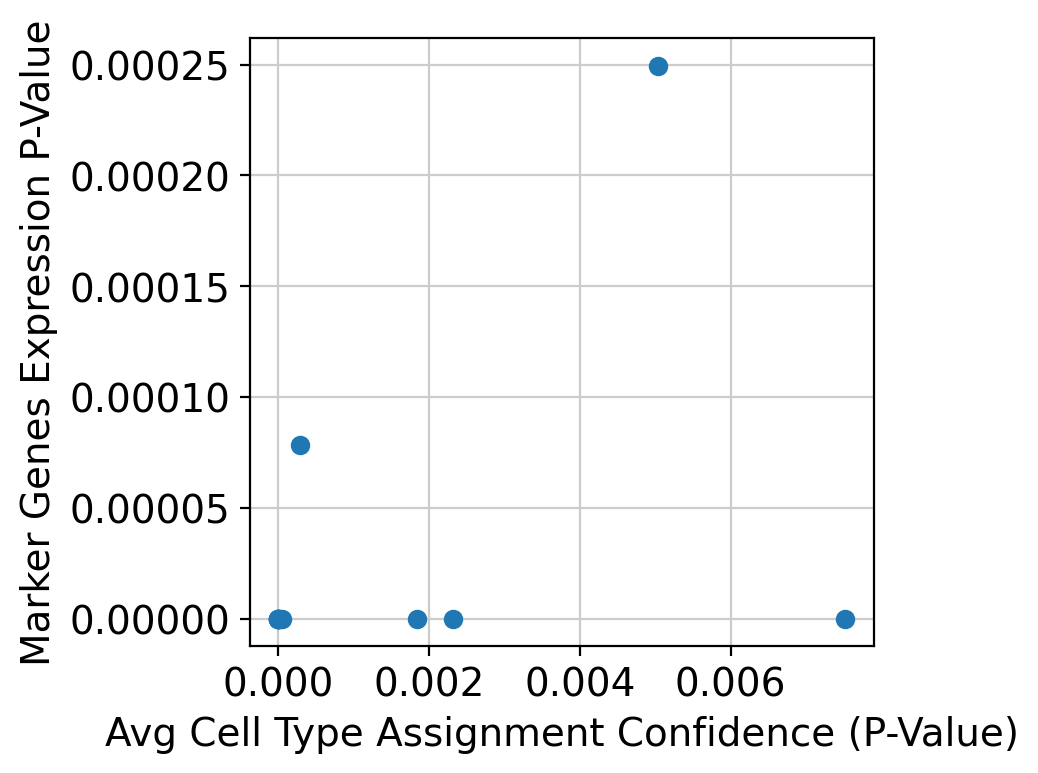

LinReg P-Value = 0.18712433553534918
LinReg R = 0.40870837642718405
Correlation Coefficient = 0.40870837642718416


In [ ]:
# Linear regression analysis between marker gene quality and mean assignment confidence (p-value) 

Pancreas_MeanAssignmentConfidence = []

for cell in PancreasMarkerGeneQuality['cell_type']: 
        Pancreas_MeanAssignmentConfidence.append(
            statistics.mean(BiasedAE_Pancreas_Predictions['pVal'].iloc[np.where(Pancreas_adata.obs['Model Pancreas Predictions'] == cell)])
        )

plt.plot(Pancreas_MeanAssignmentConfidence, PancreasMarkerGeneQuality['p_value'], 'o')
plt.xlabel('Avg Cell Type Assignment Confidence (P-Value)'); plt.ylabel('Marker Genes Expression P-Value')
plt.show()
Pancreas_Results = scipy.stats.linregress(Pancreas_MeanAssignmentConfidence, PancreasMarkerGeneQuality['p_value'])
print("LinReg P-Value = " + str(Pancreas_Results.pvalue))
print("LinReg R = " + str(Pancreas_Results.rvalue))
print("Correlation Coefficient = " + str(np.corrcoef(Pancreas_MeanAssignmentConfidence, PancreasMarkerGeneQuality['p_value'])[0][1]))

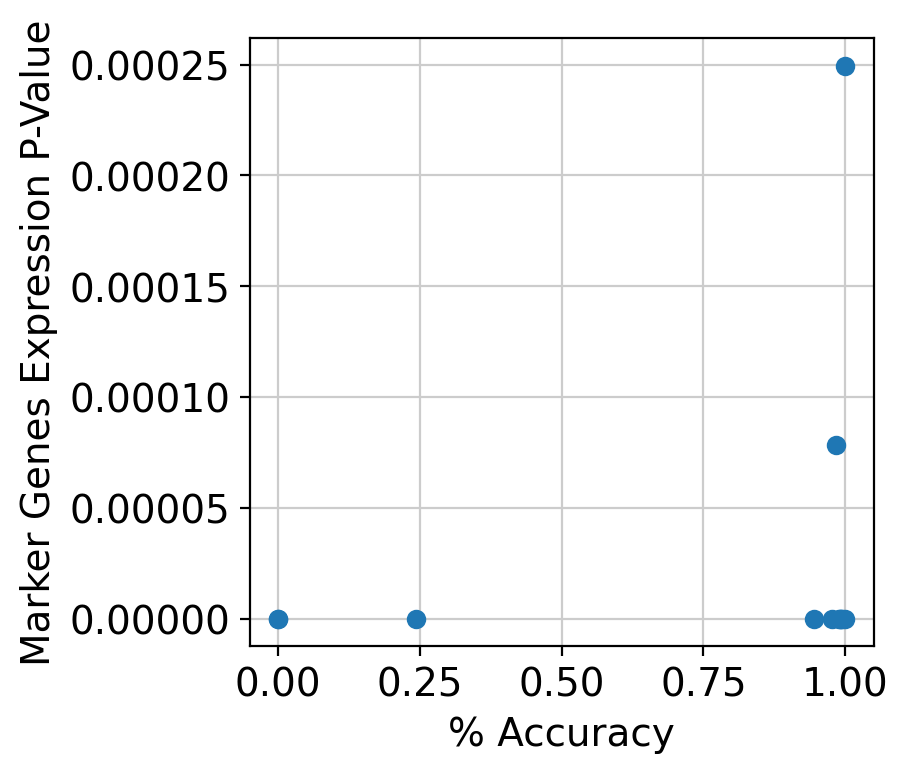

LinReg P-Value = 0.46859966833814226
LinReg R = 0.23174750758131227
Correlation Coefficient = 0.23174750758131224


In [ ]:
# Evaluate cell type specific accuracy association with marker gene quality 

Pancreas_pVal_ordered = []
Pancreas_CellType_ordered = []
Pancreas_Accs_ordered = []

for i in pd.unique(Pancreas_adata.obs['Cell Type']):
  if len(np.where(PancreasMarkerGeneQuality['cell_type'] == i)[0]) > 0: 
    Pancreas_Accs_ordered.append(CellTypeAccs[np.where(PancreasMarkerGeneQuality['cell_type'] == i)[0][0]])
    Pancreas_CellType_ordered.append(i)
    Pancreas_pVal_ordered.append(PancreasMarkerGeneQuality.iloc[np.where(PancreasMarkerGeneQuality['cell_type'] == i)[0][0],2])

plt.plot(Pancreas_Accs_ordered, Pancreas_pVal_ordered, 'o')
plt.xlabel('% Accuracy'); plt.ylabel('Marker Genes Expression P-Value')
plt.show()
Pancreas_Results = scipy.stats.linregress(Pancreas_Accs_ordered, Pancreas_pVal_ordered)
# print("scCATCH: R-value correlation between marker gene quality and model performance = " + str(Pancreas_Results.rvalue))
print("LinReg P-Value = " + str(Pancreas_Results.pvalue))
print("LinReg R = " + str(Pancreas_Results.rvalue))
print("Correlation Coefficient = " + str(np.corrcoef(Pancreas_Accs_ordered, Pancreas_pVal_ordered)[0][1]))

# AE Model: GBM Data

In [ ]:
BiasedAE_GBM_Predictions = pd.read_csv("/content/drive/My Drive/ML for genomics project group /Data/GBM Data/Processed/sparseAE_GBM_predictions.csv")
BiasedAE_GBM_Predictions

,Unnamed: 0,score_S,score_G2M,Cell Type,Predicted Cell Type,pVal
0,0,-0.029341,-0.136263,Macrophage,Macrophages,5.376911e-03
1,1,-0.110007,-0.113940,Macrophage,Malignant,7.865374e-09
2,2,-0.080773,-0.007821,Macrophage,Malignant,1.611079e-03
3,3,-0.146009,-0.081766,Macrophage,Macrophages,2.565820e-10
4,4,-0.052392,-0.100400,Macrophage,Macrophages,6.940559e-11
...,...,...,...,...,...,...
7925,7925,-0.005191,-0.112676,Malignant,Malignant,2.164371e-11
7926,7926,-0.183785,-0.162173,Malignant,Malignant,1.326509e-09
7927,7927,0.492033,0.129070,Malignant,Malignant,5.973943e-11
7928,7928,-0.107920,-0.205744,Malignant,Malignant,2.398712e-09


In [ ]:
print(pd.unique(BiasedAE_GBM_Predictions['Predicted Cell Type']))
print(pd.unique(BiasedAE_GBM_Predictions['Cell Type']))

['Macrophages' 'Malignant' 'Oligodendrocytes' 'T cells']
['Macrophage' 'Malignant' 'Oligodendrocyte' 'T-cell']


In [ ]:
BiasedAE_Predictions = []
for i in BiasedAE_GBM_Predictions['Predicted Cell Type'].values:
  if i == 'Macrophages':
    BiasedAE_Predictions.append('Macrophage')
  elif i == 'Oligodendrocytes':
    BiasedAE_Predictions.append('Oligodendrocyte')
  elif i == 'T cells':
    BiasedAE_Predictions.append('T-cell')
  elif i == 'Malignant':
    BiasedAE_Predictions.append('Malignant')

GBM_adata.obs['Model GBM Predictions'] = BiasedAE_Predictions

In [ ]:
CorrectPred = 0
i = 0
GBMPredictionEval = []
for pred in GBM_adata.obs['Cell Type'].values: 
  if pred == GBM_adata.obs['Model GBM Predictions'].values[i]:
    CorrectPred += 1
    GBMPredictionEval.append('Correct')
  else:
    GBMPredictionEval.append('Incorrect')
  i += 1

GBM_adata.obs['Model GBM Evaluation'] = GBMPredictionEval

print('VAE % Accuracy Performance: GBM Data')
print('Overall = ' + str(CorrectPred / GBM_adata.shape[0]))

# Cell Type Subpopulations 
CellTypeAccs = []
for CellType in pd.unique(GBM_adata.obs['Cell Type']):
    CorrectPred = 0
    i = 0
    for pred in GBM_adata.obs['Cell Type'].values: 
      if (pred == GBM_adata.obs['Model GBM Predictions'].values[i]) & (pred == CellType):
        CorrectPred += 1
      i += 1

    CellTypeAccs.append(CorrectPred / len(np.where(GBM_adata.obs['Cell Type'] == CellType)[0]))
    print(CellType + ' = ' + str(CorrectPred / len(np.where(GBM_adata.obs['Cell Type'] == CellType)[0])))

VAE % Accuracy Performance: GBM Data
Overall = 0.9949558638083228
Macrophage = 0.9655172413793104
Malignant = 0.9989800378843071
Oligodendrocyte = 0.9908675799086758
T-cell = 0.9468085106382979


In [ ]:
sc.tl.pca(GBM_adata, svd_solver='arpack', use_highly_variable=False)
sc.pp.neighbors(GBM_adata)
sc.tl.umap(GBM_adata)

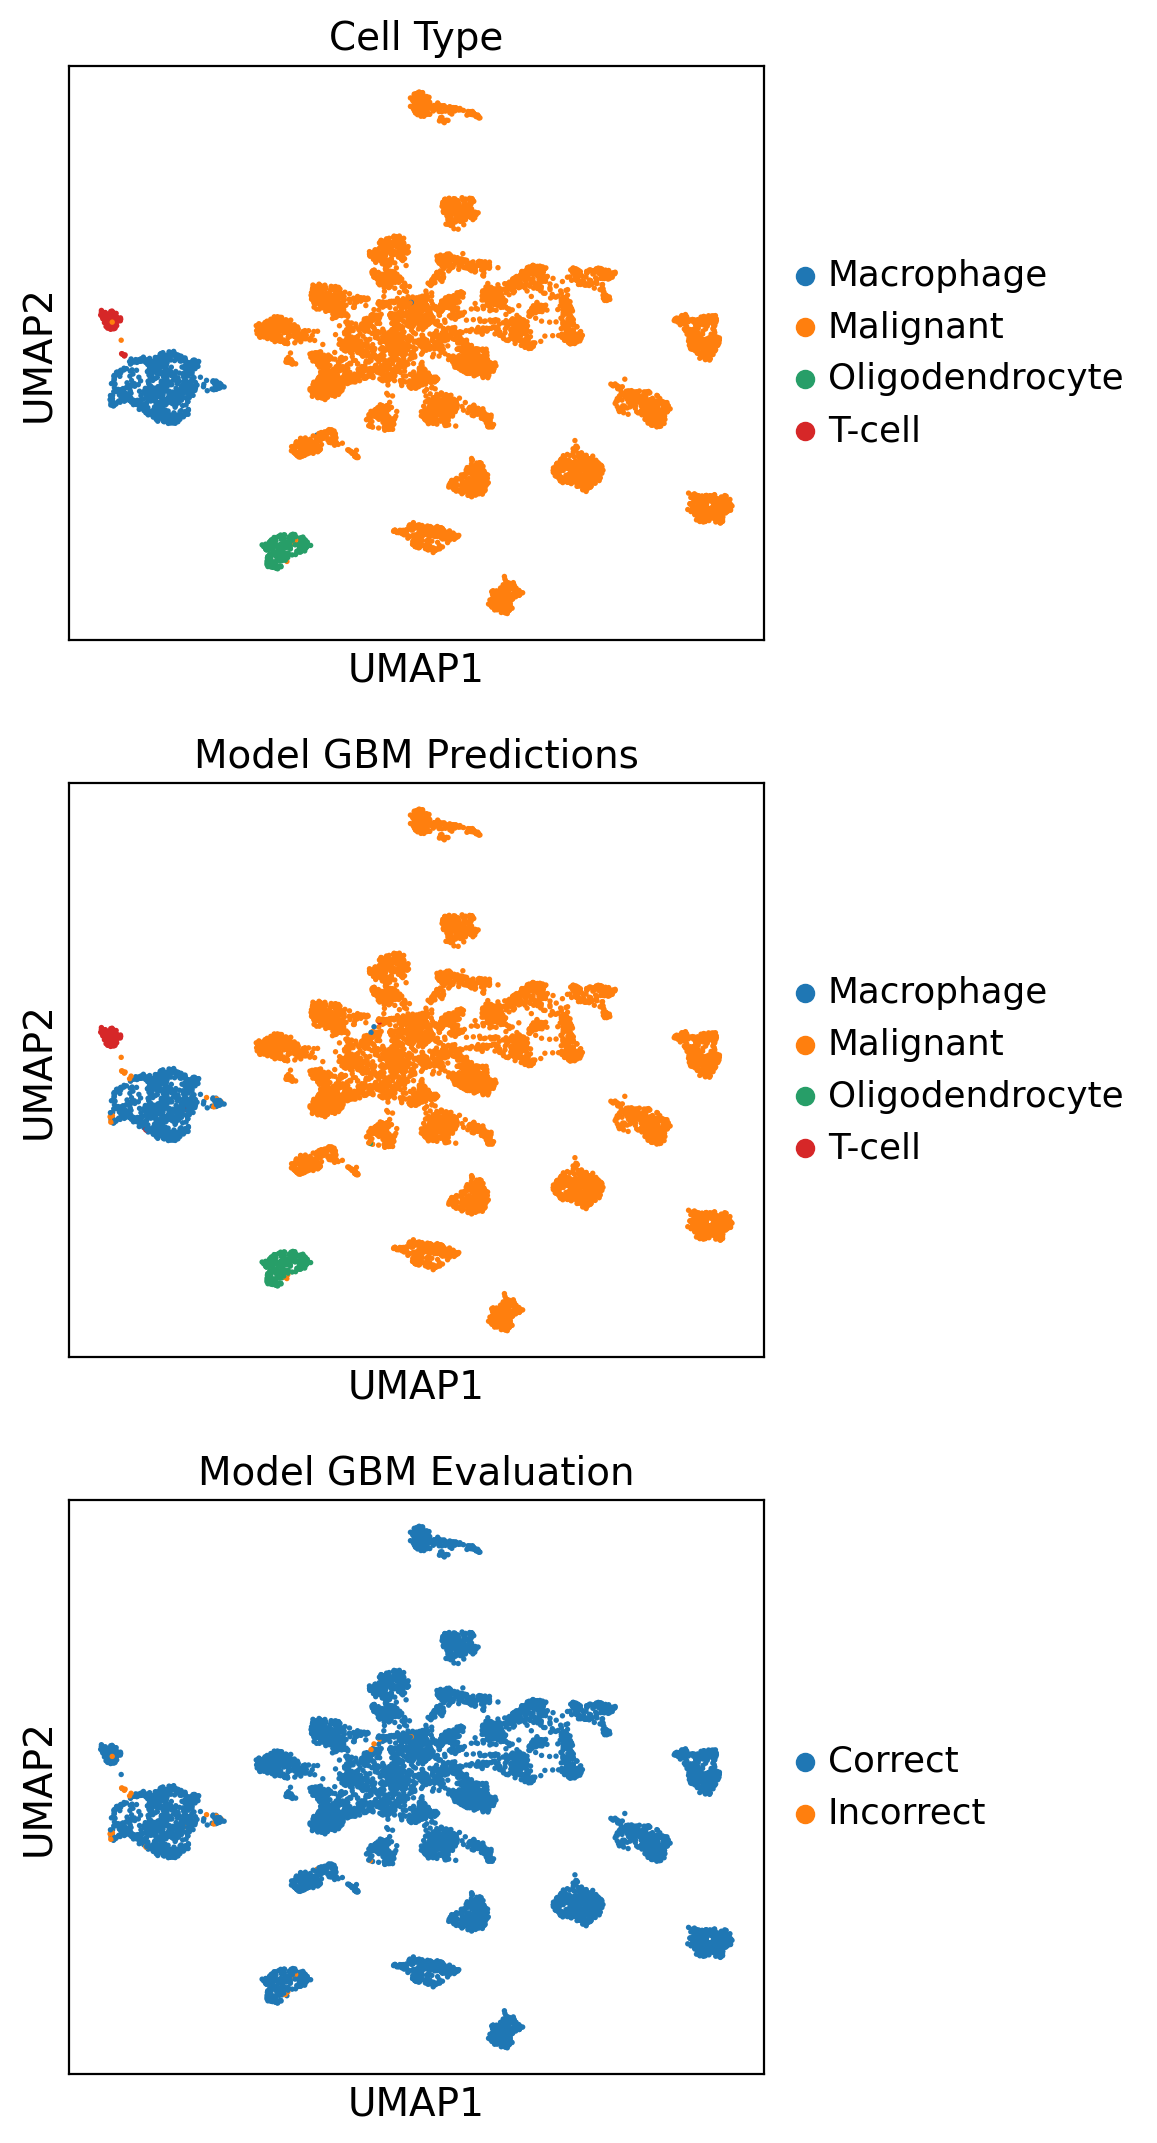

In [ ]:
sc.pl.umap(GBM_adata, color = ['Cell Type',
                               'Model GBM Predictions',
                               'Model GBM Evaluation'],
           ncols = 1)

In [ ]:
# Compare average p-value in correct predictions vs incorrect predictions (t-test)
from scipy import stats
import statistics

stat, p_val = stats.ttest_ind(BiasedAE_GBM_Predictions['pVal'].iloc[np.where(GBM_adata.obs['Model GBM Evaluation'] == 'Correct')],
                              BiasedAE_GBM_Predictions['pVal'].iloc[np.where(GBM_adata.obs['Model GBM Evaluation'] == 'Incorrect')])
Correct_Mean_pVal = statistics.mean(BiasedAE_GBM_Predictions['pVal'].iloc[np.where(GBM_adata.obs['Model GBM Evaluation'] == 'Correct')])
Incorrect_Mean_pVal = statistics.mean(BiasedAE_GBM_Predictions['pVal'].iloc[np.where(GBM_adata.obs['Model GBM Evaluation'] == 'Incorrect')])

print('Mean Prediction Confidence in Correct Prediction = ' + str(Correct_Mean_pVal))
print('Mean Prediction Confidence in Incorrect Prediction = ' + str(Incorrect_Mean_pVal))
print('P-Value of the Statistical Difference in Average P-Value = ' + str(p_val))

Mean Prediction Confidence in Correct Prediction = 6.305504992727722e-06
Mean Prediction Confidence in Incorrect Prediction = 0.007226502452389953
P-Value of the Statistical Difference in Average P-Value = 1.5721749409029832e-46


In [ ]:
GBMMarkerGeneQuality = pd.read_csv("/content/drive/My Drive/ML for genomics project group /Data/GBM Data/Processed/GBMMarkerGeneQuality.csv")

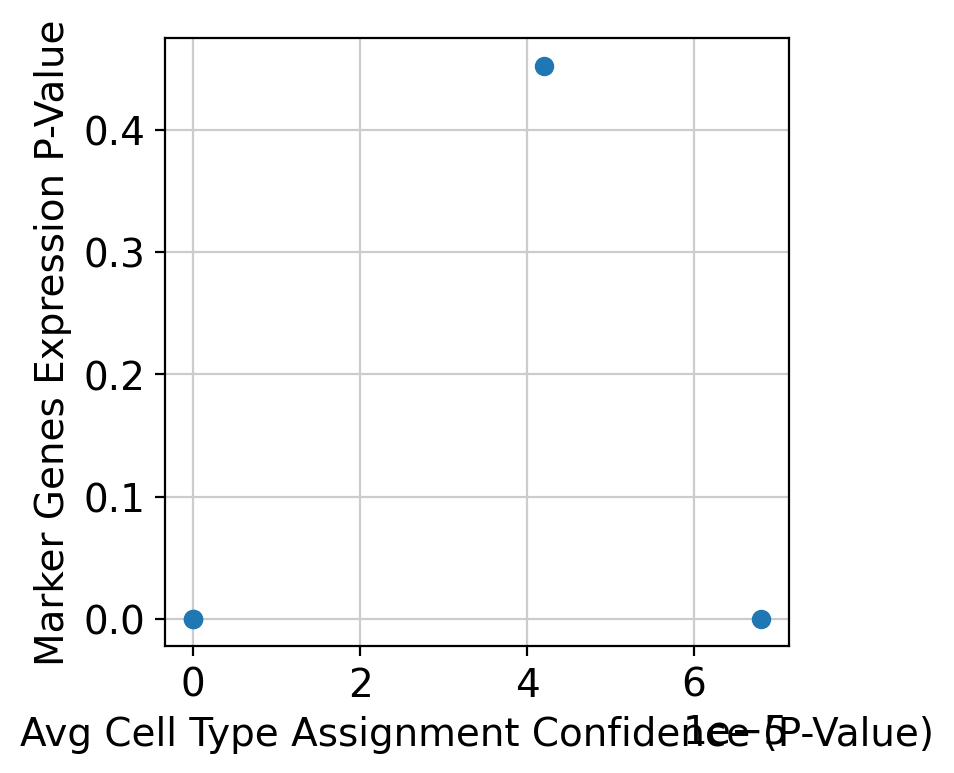

LinReg P-Value = 0.7115687898930448
LinReg R = 0.28843121010695516
Correlation Coefficient = 0.2884312101069552


In [ ]:
# Linear regression analysis between marker gene quality and mean assignment confidence (p-value) 

GBM_MeanAssignmentConfidence = []

for cell in GBMMarkerGeneQuality['cell_type']: 
        GBM_MeanAssignmentConfidence.append(
            statistics.mean(BiasedAE_GBM_Predictions['pVal'].iloc[np.where(GBM_adata.obs['Model GBM Predictions'] == cell)])
        )

plt.plot(GBM_MeanAssignmentConfidence, GBMMarkerGeneQuality['p_value'], 'o')
plt.xlabel('Avg Cell Type Assignment Confidence (P-Value)'); plt.ylabel('Marker Genes Expression P-Value')
plt.show()
GBM_Results = scipy.stats.linregress(GBM_MeanAssignmentConfidence, GBMMarkerGeneQuality['p_value'])
print("LinReg P-Value = " + str(GBM_Results.pvalue))
print("LinReg R = " + str(GBM_Results.rvalue))
print("Correlation Coefficient = " + str(np.corrcoef(GBM_MeanAssignmentConfidence, GBMMarkerGeneQuality['p_value'])[0][1]))

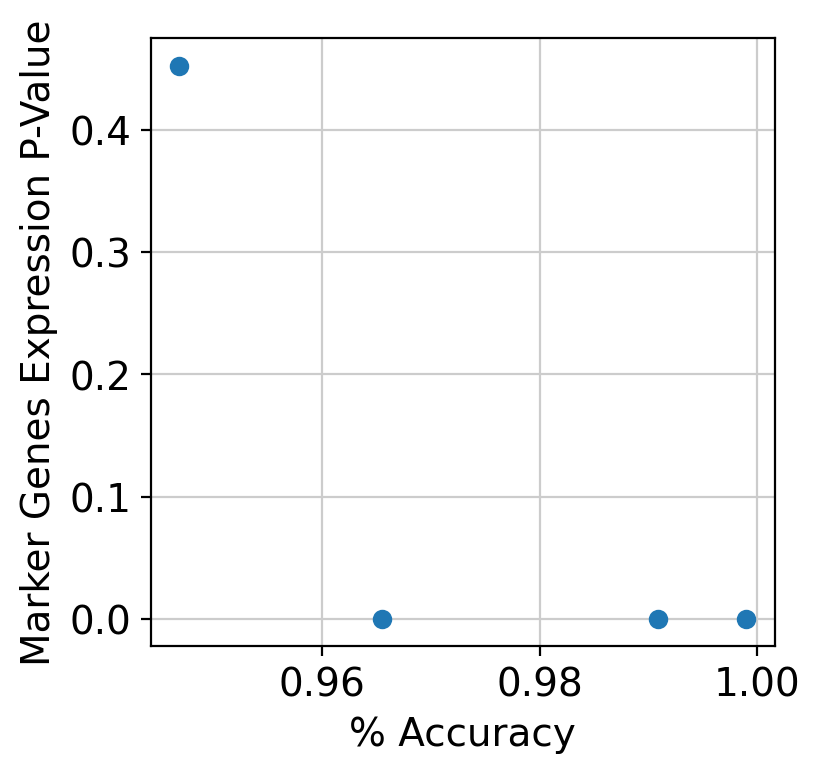

LinReg P-Value = 0.19769627905824133
LinReg R = -0.8023037209417586
Correlation Coefficient = -0.8023037209417586


In [ ]:
pVal_ordered = []
CellType_ordered = []
Accs_ordered = []

for i in pd.unique(GBM_adata.obs['Cell Type']):
  if len(np.where(GBMMarkerGeneQuality['cell_type'] == i)[0]) > 0: 
    Accs_ordered.append(CellTypeAccs[np.where(GBMMarkerGeneQuality['cell_type'] == i)[0][0]])
    CellType_ordered.append(i)
    pVal_ordered.append(GBMMarkerGeneQuality.iloc[np.where(GBMMarkerGeneQuality['cell_type'] == i)[0][0],2])

plt.plot(Accs_ordered, pVal_ordered, 'o')
plt.xlabel('% Accuracy'); plt.ylabel('Marker Genes Expression P-Value')
plt.show()
GBM_Results = scipy.stats.linregress(Accs_ordered, pVal_ordered)
# print("scCATCH: R-value correlation between marker gene quality and model performance = " + str(Pancreas_Results.rvalue))
print("LinReg P-Value = " + str(GBM_Results.pvalue))
print("LinReg R = " + str(GBM_Results.rvalue))
print("Correlation Coefficient = " + str(np.corrcoef(Accs_ordered, pVal_ordered)[0][1]))

# CellTypist Data: VAE Model + CellTypist

In [ ]:
VAE_Predictions = pd.read_csv("/content/drive/My Drive/ML for genomics project group /Data/CellTypist Data/CellTypist_CTdata_predictions.csv")
VAE_Predictions 

,Unnamed: 0,cell_type,predicted_labels,majority_voting,conf_score,over_clustering
0,cell1,Plasma cells,Plasma cells,gamma-delta T cells,0.999762,25
1,cell2,Plasma cells,Plasma cells,Plasma cells,0.999926,19
2,cell3,Plasma cells,Plasma cells,gamma-delta T cells,0.955991,25
3,cell4,Plasma cells,Plasma cells,Plasma cells,0.999883,1
4,cell5,Plasma cells,Plasma cells,Plasma cells,0.999890,1
...,...,...,...,...,...,...
1995,cell1996,Neutrophil-myeloid progenitor,HSC/MPP,Neutrophil-myeloid progenitor,0.152962,14
1996,cell1997,Neutrophil-myeloid progenitor,Neutrophil-myeloid progenitor,Neutrophil-myeloid progenitor,0.810408,21
1997,cell1998,Neutrophil-myeloid progenitor,Neutrophil-myeloid progenitor,Neutrophil-myeloid progenitor,0.961021,9
1998,cell1999,Neutrophil-myeloid progenitor,Neutrophil-myeloid progenitor,Neutrophil-myeloid progenitor,0.131777,21


In [ ]:
# print(pd.unique(VAE_Predictions['VAE predictions']))
print(pd.unique(VAE_Predictions['majority_voting']))
print(pd.unique(VAE_Predictions['cell_type']))

['gamma-delta T cells' 'Plasma cells' 'Follicular B cells' 'DC1'
 'Neutrophil-myeloid progenitor' 'Kupffer cells' 'Alveolar macrophages'
 'pDC' 'Endothelial cells' 'Late erythroid' 'Mast cells']
['Plasma cells' 'gamma-delta T cells' 'Follicular B cells' 'DC1'
 'Kupffer cells' 'Macrophages' 'pDC' 'Endothelial cells' 'Mast cells'
 'Neutrophil-myeloid progenitor']


In [ ]:
Predictions = VAE_Predictions['majority_voting'].values
j = 0
for i in VAE_Predictions['majority_voting'].values:
  if i == 'Gamma delta T cells':
    Predictions[j] = 'gamma-delta T cells'
  if i == 'Alveolar macrophages':
    Predictions[j] = 'Macrophages'
  j += 1

adata_2000.obs['Model Predictions'] = Predictions

In [ ]:
CorrectPred = 0
i = 0
PredictionEval = []
for pred in adata_2000.obs['cell_type'].values: 
  if pred == adata_2000.obs['Model Predictions'].values[i]:
    CorrectPred += 1
    PredictionEval.append('Correct')
  else:
    PredictionEval.append('Incorrect')
  i += 1

adata_2000.obs['Model Evaluation'] = PredictionEval

print('CellTypist % Accuracy Performance: CellTypist Data')
print('Overall = ' + str(CorrectPred / adata_2000.shape[0]))

# Cell Type Subpopulations 
CellTypeAccs = []
for CellType in pd.unique(adata_2000.obs['cell_type']):
    CorrectPred = 0
    i = 0
    for pred in adata_2000.obs['cell_type'].values: 
      if (pred == adata_2000.obs['Model Predictions'].values[i]) & (pred == CellType):
        CorrectPred += 1
      i += 1

    CellTypeAccs.append(CorrectPred / len(np.where(adata_2000.obs['cell_type'] == CellType)[0]))
    print(CellType + ' = ' + str(CorrectPred / len(np.where(adata_2000.obs['cell_type'] == CellType)[0])))

CellTypist % Accuracy Performance: CellTypist Data
Overall = 0.9845
Plasma cells = 0.945
gamma-delta T cells = 0.995
Follicular B cells = 0.99
DC1 = 0.995
Kupffer cells = 1.0
Macrophages = 1.0
pDC = 0.975
Endothelial cells = 0.975
Mast cells = 0.985
Neutrophil-myeloid progenitor = 0.985


In [ ]:
sc.pp.pca(adata_2000, use_highly_variable=False)
sc.pp.neighbors(adata_2000)
sc.tl.umap(adata_2000)

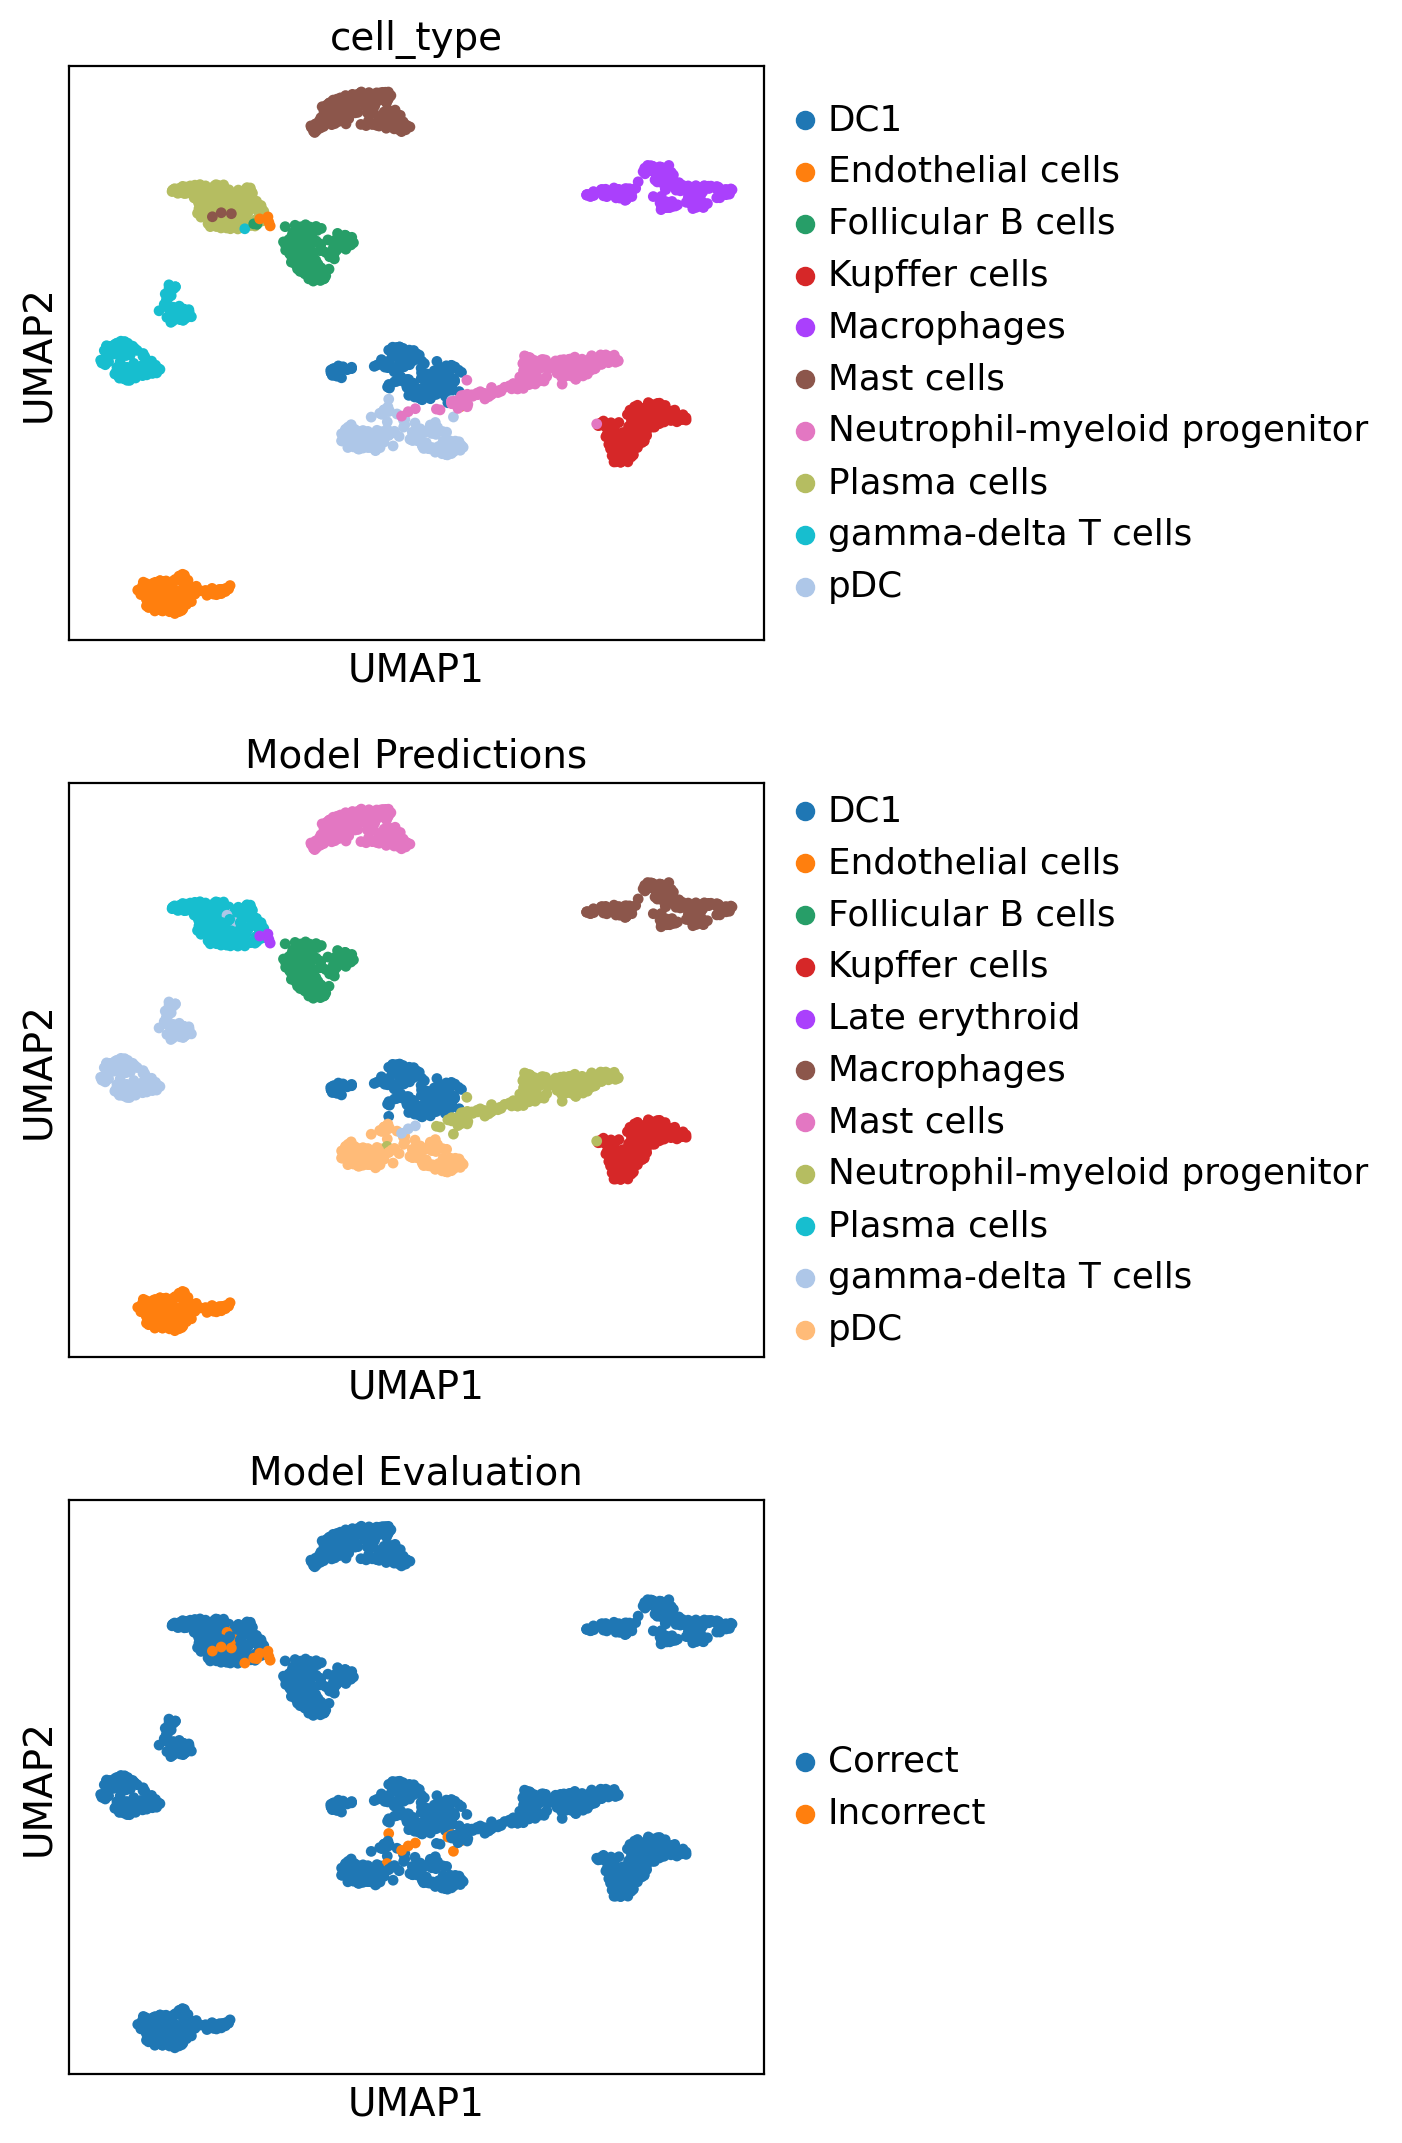

In [ ]:
sc.pl.umap(adata_2000, color = ['cell_type','Model Predictions','Model Evaluation'], ncols = 1)

In [ ]:
# Compare average p-value in correct predictions vs incorrect predictions (t-test)
from scipy import stats
import statistics

stat, p_val = stats.ttest_ind(VAE_Predictions['pVal'].iloc[np.where(adata_2000.obs['Model Evaluation'] == 'Correct')],
                              VAE_Predictions['pVal'].iloc[np.where(adata_2000.obs['Model Evaluation'] == 'Incorrect')])
Correct_Mean_pVal = statistics.mean(VAE_Predictions['pVal'].iloc[np.where(adata_2000.obs['Model Evaluation'] == 'Correct')])
Incorrect_Mean_pVal = statistics.mean(VAE_Predictions['pVal'].iloc[np.where(adata_2000.obs['Model Evaluation'] == 'Incorrect')])

print('Mean Prediction Confidence in Correct Prediction = ' + str(Correct_Mean_pVal))
print('Mean Prediction Confidence in Incorrect Prediction = ' + str(Incorrect_Mean_pVal))
print('P-Value of the Statistical Difference in Average P-Value = ' + str(p_val))

KeyError: ignored

In [ ]:
MarkerGeneQuality = pd.read_csv("/content/drive/My Drive/ML for genomics project group /Data/CellTypist Data/CT_MarkerGeneQuality.csv")
MarkerGeneQuality

In [ ]:
# Linear regression analysis between marker gene quality and mean assignment confidence (p-value) 

MeanAssignmentConfidence = []

for cell in MarkerGeneQuality['cell_type']: 
        MeanAssignmentConfidence.append(
            statistics.mean(VAE_Predictions['pVal'].iloc[np.where(adata_2000.obs['Model Predictions'] == cell)])
        )

plt.plot(MeanAssignmentConfidence, MarkerGeneQuality['p_value'], 'o')
plt.xlabel('Avg Cell Type Assignment Confidence (P-Value)'); plt.ylabel('Marker Genes Expression P-Value')
plt.show()
Results = scipy.stats.linregress(MeanAssignmentConfidence, MarkerGeneQuality['p_value'])
print("LinReg P-Value = " + str(Results.pvalue))
print("LinReg R = " + str(Results.rvalue))
print("Correlation Coefficient = " + str(np.corrcoef(MeanAssignmentConfidence, MarkerGeneQuality['p_value'])[0][1]))

In [ ]:
pVal_ordered = []
CellType_ordered = []
Accs_ordered = []

for i in pd.unique(adata_2000.obs['cell_type']):
  if len(np.where(MarkerGeneQuality['cell_type'] == i)[0]) > 0: 
    Accs_ordered.append(CellTypeAccs[np.where(MarkerGeneQuality['cell_type'] == i)[0][0]])
    CellType_ordered.append(i)
    pVal_ordered.append(MarkerGeneQuality.iloc[np.where(MarkerGeneQuality['cell_type'] == i)[0][0],2])

plt.plot(Accs_ordered, pVal_ordered, 'o')
plt.xlabel('% Accuracy'); plt.ylabel('Marker Genes Expression P-Value')
plt.show()
Results = scipy.stats.linregress(Accs_ordered, pVal_ordered)
# print("scCATCH: R-value correlation between marker gene quality and model performance = " + str(Pancreas_Results.rvalue))
print("LinReg P-Value = " + str(Results.pvalue))
print("LinReg R = " + str(Results.rvalue))
print("Correlation Coefficient = " + str(np.corrcoef(Accs_ordered, pVal_ordered)[0][1]))

# PBMC Data: VAE Model + CellTypist

In [ ]:
Model_Predictions = pd.read_csv("/content/drive/My Drive/ML for genomics project group /Data/PBMC Data/CellTypist_PBMC_predictions.csv")
Model_Predictions 

,Unnamed: 0,Cell Type,predicted_labels,over_clustering,majority_voting,conf_score
0,0,CD4 T cells,Classical monocytes,59,CD16+ NK cells,0.173491
1,1,B cells,B cells,6,B cells,0.826234
2,2,CD4 T cells,Follicular helper T cells,34,Tem/Trm cytotoxic T cells,0.599985
3,3,CD14+ Monocytes,Non-classical monocytes,8,Non-classical monocytes,0.982075
4,4,NK cells,CD16+ NK cells,0,CD16+ NK cells,0.999815
...,...,...,...,...,...,...
2462,2462,CD14+ Monocytes,Macrophages,10,Classical monocytes,0.742448
2463,2463,B cells,Plasma cells,6,B cells,0.843543
2464,2464,B cells,Naive B cells,2,B cells,0.700960
2465,2465,B cells,B cells,3,B cells,0.773905


In [ ]:
# print(pd.unique(Model_Predictions['Predicted Cell Type']))
print(pd.unique(Model_Predictions['majority_voting']))
print(pd.unique(Model_Predictions['Cell Type']))

['CD16+ NK cells' 'B cells' 'Tem/Trm cytotoxic T cells'
 'Non-classical monocytes' 'Tcm/Naive helper T cells' 'MAIT cells'
 'Classical monocytes' 'Tem/Effector helper T cells'
 'Tcm/Naive cytotoxic T cells' 'Regulatory T cells' 'DC']
['CD4 T cells' 'B cells' 'CD14+ Monocytes' 'NK cells' 'CD8 T cells'
 'Dendritic cells']


In [ ]:
# Run for CellTypist Predictions 
Predictions = Model_Predictions['majority_voting'].values

j = 0
for i in Model_Predictions['majority_voting'].values:
  if i == 'CD16+ NK cells':
    Predictions[j] = 'NK cells'
    
  if i == 'Tem/Trm cytotoxic T cells':
    Predictions[j] = 'CD8 T cells'

  if i == 'Non-classical monocytes':
    Predictions[j] = 'CD14+ Monocytes'

  if i == 'Tcm/Naive helper T cells': # CD4
    Predictions[j] = 'CD4 T cells'

  if i == 'MAIT cells':
    Predictions[j] = 'CD8 T cells'

  if i == 'Classical monocytes':
    Predictions[j] = 'CD14+ Monocytes'

  if i == 'Tem/Effector helper T cells': # CD4
    Predictions[j] = 'CD4 T cells' 

  if i == 'Tcm/Naive cytotoxic T cells':
    Predictions[j] = 'CD8 T cells'

  if i == 'Regulatory T cells': # CD4
    Predictions[j] = 'CD4 T cells'

  if i == 'DC':
    Predictions[j] = 'Dendritic cells'
  j += 1

PBMC_adata.obs['Model Predictions'] = Predictions

In [ ]:
print(pd.unique(PBMC_adata.obs['Model Predictions']))
print(pd.unique(Model_Predictions['Cell Type']))

['NK cells' 'B cells' 'CD8 T cells' 'CD14+ Monocytes' 'CD4 T cells'
 'Dendritic cells']
['CD4 T cells' 'B cells' 'CD14+ Monocytes' 'NK cells' 'CD8 T cells'
 'Dendritic cells']


In [ ]:
CorrectPred = 0
i = 0
PredictionEval = []
for pred in PBMC_adata.obs['Cell Type'].values: 
  if pred == PBMC_adata.obs['Model Predictions'].values[i]:
    CorrectPred += 1
    PredictionEval.append('Correct')
  else:
    PredictionEval.append('Incorrect')
  i += 1

PBMC_adata.obs['Model Evaluation'] = PredictionEval

print('Biased VAE % Accuracy Performance: PBMC Data')
print('Overall = ' + str(CorrectPred / PBMC_adata.shape[0]))

# Cell Type Subpopulations 
CellTypeAccs = []
for CellType in pd.unique(PBMC_adata.obs['Cell Type']):
    CorrectPred = 0
    i = 0
    for pred in PBMC_adata.obs['Cell Type'].values: 
      if (pred == PBMC_adata.obs['Model Predictions'].values[i]) & (pred == CellType):
        CorrectPred += 1
      i += 1

    CellTypeAccs.append(CorrectPred / len(np.where(PBMC_adata.obs['Cell Type'] == CellType)[0]))
    print(CellType + ' = ' + str(CorrectPred / len(np.where(PBMC_adata.obs['Cell Type'] == CellType)[0])))

Biased VAE % Accuracy Performance: PBMC Data
Overall = 0.8962302391568707
CD4 T cells = 0.8382608695652174
B cells = 0.9649122807017544
CD14+ Monocytes = 0.9937369519832986
NK cells = 0.9612903225806452
CD8 T cells = 0.8474025974025974
Dendritic cells = 0.9393939393939394


In [ ]:
sc.pp.pca(PBMC_adata, use_highly_variable=False)
sc.pp.neighbors(PBMC_adata)
sc.tl.umap(PBMC_adata)

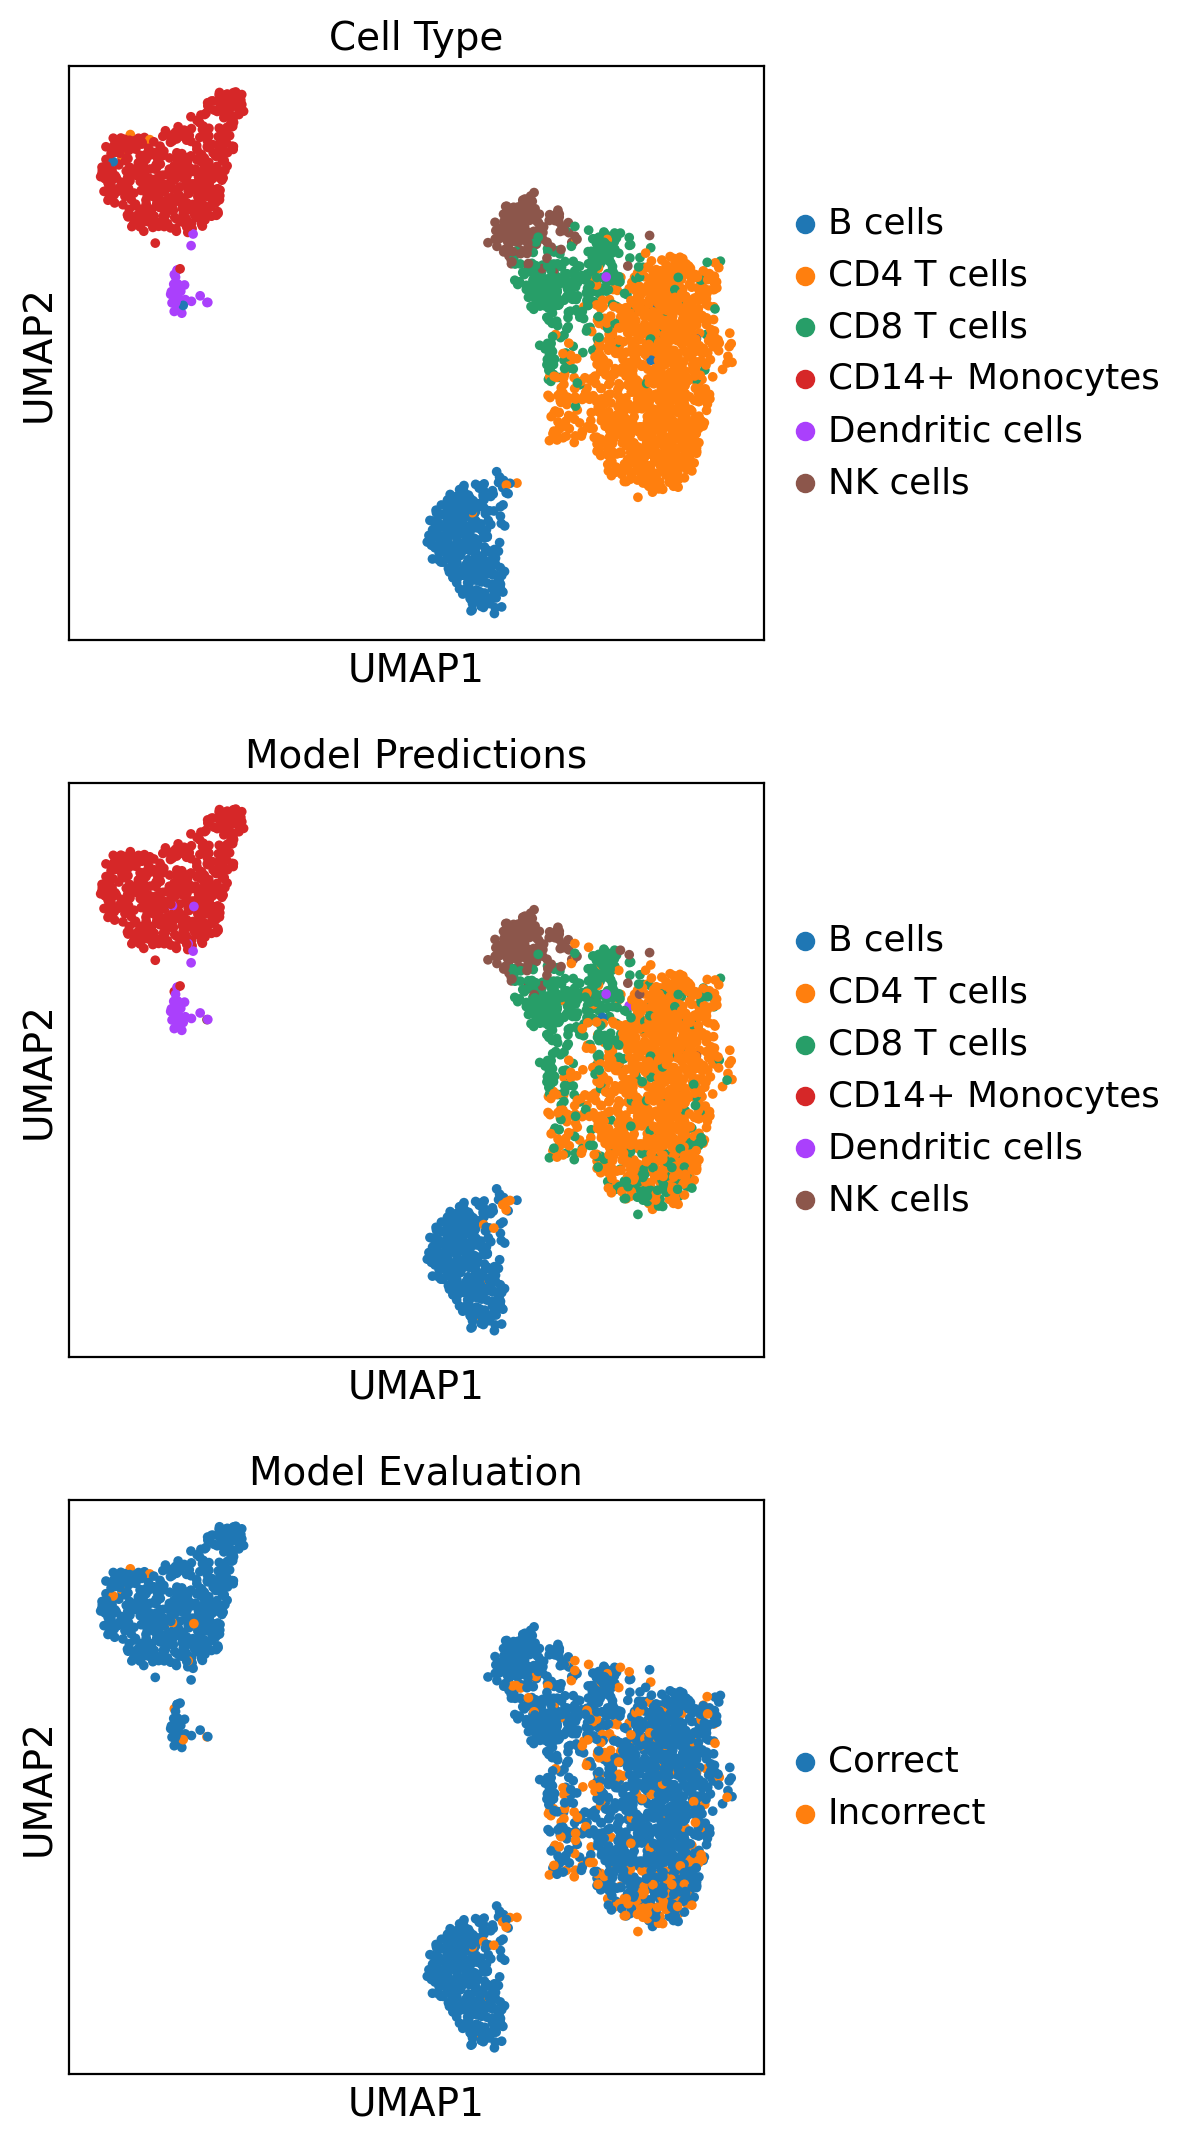

In [ ]:
sc.pl.umap(PBMC_adata, color = ['Cell Type','Model Predictions','Model Evaluation'], ncols = 1)

In [ ]:
# Compare average p-value in correct predictions vs incorrect predictions (t-test)
from scipy import stats
import statistics

stat, p_val = stats.ttest_ind(Model_Predictions['pVal'].iloc[np.where(PBMC_adata.obs['Model Evaluation'] == 'Correct')],
                              Model_Predictions['pVal'].iloc[np.where(PBMC_adata.obs['Model Evaluation'] == 'Incorrect')])
Correct_Mean_pVal = statistics.mean(Model_Predictions['pVal'].iloc[np.where(PBMC_adata.obs['Model Evaluation'] == 'Correct')])
Incorrect_Mean_pVal = statistics.mean(Model_Predictions['pVal'].iloc[np.where(PBMC_adata.obs['Model Evaluation'] == 'Incorrect')])

print('Mean Prediction Confidence in Correct Prediction = ' + str(Correct_Mean_pVal))
print('Mean Prediction Confidence in Incorrect Prediction = ' + str(Incorrect_Mean_pVal))
print('P-Value of the Statistical Difference in Average P-Value = ' + str(p_val))

KeyError: ignored

In [ ]:
MarkerGeneQuality = pd.read_csv("/content/drive/My Drive/ML for genomics project group /Data/PBMC Data/PBMC_MarkerGeneQuality.csv")
MarkerGeneQuality

In [ ]:
MarkerGeneQuality['p_value'].values[np.where(MarkerGeneQuality['cell_type'] != "Dendritic cells")]

In [ ]:
# Linear regression analysis between marker gene quality and mean assignment confidence (p-value) 

MeanAssignmentConfidence = []

for cell in MarkerGeneQuality['cell_type']: 
        if cell != "Dendritic cells":
            MeanAssignmentConfidence.append(
                statistics.mean(Model_Predictions['pVal'].iloc[np.where(PBMC_adata.obs['Model Predictions'] == cell)])
            )

plt.plot(MeanAssignmentConfidence, 
         MarkerGeneQuality['p_value'].values[np.where(MarkerGeneQuality['cell_type'] != "Dendritic cells")], 
         'o')
plt.xlabel('Avg Cell Type Assignment Confidence (P-Value)'); plt.ylabel('Marker Genes Expression P-Value')
plt.show()
Results = scipy.stats.linregress(MeanAssignmentConfidence, 
                                 MarkerGeneQuality['p_value'].values[np.where(MarkerGeneQuality['cell_type'] != "Dendritic cells")])
print("LinReg P-Value = " + str(Results.pvalue))
print("LinReg R = " + str(Results.rvalue))
print("Correlation Coefficient = " + str(np.corrcoef(MeanAssignmentConfidence, 
                                                     MarkerGeneQuality['p_value'].values[np.where(MarkerGeneQuality['cell_type'] != "Dendritic cells")])[0][1]))

In [ ]:
pVal_ordered = []
CellType_ordered = []
Accs_ordered = []

for i in pd.unique(PBMC_adata.obs['Cell Type']):
  if len(np.where(MarkerGeneQuality['cell_type'] == i)[0]) > 0: 
    Accs_ordered.append(CellTypeAccs[np.where(MarkerGeneQuality['cell_type'] == i)[0][0]])
    CellType_ordered.append(i)
    pVal_ordered.append(MarkerGeneQuality.iloc[np.where(MarkerGeneQuality['cell_type'] == i)[0][0],2])

plt.plot(Accs_ordered, pVal_ordered, 'o')
plt.xlabel('% Accuracy'); plt.ylabel('Marker Genes Expression P-Value')
plt.show()
Results = scipy.stats.linregress(Accs_ordered, pVal_ordered)
# print("scCATCH: R-value correlation between marker gene quality and model performance = " + str(Pancreas_Results.rvalue))
print("LinReg P-Value = " + str(Results.pvalue))
print("LinReg R = " + str(Results.rvalue))
print("Correlation Coefficient = " + str(np.corrcoef(Accs_ordered, pVal_ordered)[0][1]))

NameError: ignored

# Follicular Lymphoma

In [ ]:
Model_Predictions = pd.read_csv("/content/drive/My Drive/ML for genomics project group /Data/CellAssign Data /CellAssign_FollicularLymphoma_predictions.csv")
Model_Predictions 

,Barcode,Sample,dataset,patient,timepoint,progression_status,patient_progression,sample_barcode,is_cell_control,total_features_by_counts,...,all_seurat_1.2_cluster,all_sc3_cluster,all_SC3_cluster,all_cluster,all_subset_seurat_cluster,all_subset_seurat_0.8_cluster,all_subset_seurat_1.2_cluster,all_subset_cluster,_scvi_batch,scvi-tools predictions
0,AAACCTGAGCCACGTC-1,/datadrive/data/follicular/FL1018T1/filtered_g...,FL1018T1,FL1018,T1,primary,transformed,FL1018T1_AAACCTGAGCCACGTC-1,0,1300,...,4,11,11,5,9,7,9,7,0,B cells
1,AAACCTGAGGGCTCTC-1,/datadrive/data/follicular/FL1018T1/filtered_g...,FL1018T1,FL1018,T1,primary,transformed,FL1018T1_AAACCTGAGGGCTCTC-1,0,846,...,4,11,11,5,13,11,13,11,0,B cells
2,AAACCTGCACGAAGCA-1,/datadrive/data/follicular/FL1018T1/filtered_g...,FL1018T1,FL1018,T1,primary,transformed,FL1018T1_AAACCTGCACGAAGCA-1,0,1184,...,4,19,19,5,0,1,0,1,0,B cells
3,AAACCTGCAGTTAACC-1,/datadrive/data/follicular/FL1018T1/filtered_g...,FL1018T1,FL1018,T1,primary,transformed,FL1018T1_AAACCTGCAGTTAACC-1,0,2019,...,4,11,11,5,3,4,3,4,0,B cells
4,AAACCTGCATTCCTGC-1,/datadrive/data/follicular/FL1018T1/filtered_g...,FL1018T1,FL1018,T1,primary,transformed,FL1018T1_AAACCTGCATTCCTGC-1,0,1407,...,8,27,27,7,6,2,6,2,0,CD4 T cells
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9151,TTTGTCACAAGACGTG-1,/datadrive/data/follicular/FL2001T2/filtered_g...,FL2001T2,FL2001,T2,progressed,progressed,FL2001T2_TTTGTCACAAGACGTG-1,0,2162,...,7,11,11,6,5,5,5,5,0,B cells
9152,TTTGTCACAAGGTTTC-1,/datadrive/data/follicular/FL2001T2/filtered_g...,FL2001T2,FL2001,T2,progressed,progressed,FL2001T2_TTTGTCACAAGGTTTC-1,0,737,...,5,38,38,4,11,9,11,9,0,B cells
9153,TTTGTCAGTCGAGATG-1,/datadrive/data/follicular/FL2001T2/filtered_g...,FL2001T2,FL2001,T2,progressed,progressed,FL2001T2_TTTGTCAGTCGAGATG-1,0,1376,...,7,36,36,6,11,9,11,9,0,B cells
9154,TTTGTCATCAACACAC-1,/datadrive/data/follicular/FL2001T2/filtered_g...,FL2001T2,FL2001,T2,progressed,progressed,FL2001T2_TTTGTCATCAACACAC-1,0,1372,...,0,8,8,1,5,5,5,5,0,B cells


In [ ]:
# print(pd.unique(Model_Predictions['Predicted Cell Type']))
# print(pd.unique(Model_Predictions['Cell Type']))

print(pd.unique(Model_Predictions['scvi-tools predictions']))
print(pd.unique(Model_Predictions['celltype']))

['B cells' 'CD4 T cells' 'Cytotoxic T cells' 'Tfh' 'other']
['B cells' 'CD4 T cells' 'Cytotoxic T cells' 'Tfh' 'other']


In [ ]:
GroundTruth = Model_Predictions['celltype'].values
j = 0
for i in Model_Predictions['celltype'].values:
  if i == 'B cells (malignant)':
    GroundTruth[j] = 'B cells'
  j += 1

SceFollicula_adata.obs['Cell Type'] = GroundTruth
# SceFollicula_adata.obs['Predicted Cell Type'] = Model_Predictions['Predicted Cell Type'].values
SceFollicula_adata.obs['Predicted Cell Type'] = Model_Predictions['scvi-tools predictions'].values

Model_Predictions['Predicted Cell Type'] = Model_Predictions['scvi-tools predictions'].values
Model_Predictions['Cell Type'] = GroundTruth

In [ ]:
print(pd.unique(Model_Predictions['Predicted Cell Type']))
print(pd.unique(Model_Predictions['Cell Type']))

['B cells' 'CD4 T cells' 'Cytotoxic T cells' 'Tfh' 'other']
['B cells' 'CD4 T cells' 'Cytotoxic T cells' 'Tfh' 'other']


In [ ]:
CorrectPred = 0
i = 0
SceFolliculaPredictionEval = []
for pred in SceFollicula_adata.obs['Cell Type'].values: 
  if pred == Model_Predictions['Predicted Cell Type'].values[i]:
    CorrectPred += 1
    SceFolliculaPredictionEval.append('Correct')
  else:
    SceFolliculaPredictionEval.append('Incorrect')
  i += 1

SceFollicula_adata.obs['Model Evaluation'] = SceFolliculaPredictionEval

print('VAE % Accuracy Performance: Follicular Lymphoma Data')
print('Overall = ' + str(CorrectPred / SceFollicula_adata.shape[0]))

# Cell Type Subpopulations 
CellTypeAccs = []
for CellType in pd.unique(SceFollicula_adata.obs['Cell Type']):
    CorrectPred = 0
    i = 0
    for pred in SceFollicula_adata.obs['Cell Type'].values: 
      if (pred == Model_Predictions['Predicted Cell Type'].values[i]) & (pred == CellType):
        CorrectPred += 1
      i += 1

    CellTypeAccs.append(CorrectPred / len(np.where(SceFollicula_adata.obs['Cell Type'] == CellType)[0]))
    print(CellType + ' = ' + str(CorrectPred / len(np.where(SceFollicula_adata.obs['Cell Type'] == CellType)[0])))

VAE % Accuracy Performance: Follicular Lymphoma Data
Overall = 0.9936653560506772
B cells = 0.9997350291467939
CD4 T cells = 0.9678571428571429
Cytotoxic T cells = 0.9809523809523809
Tfh = 0.9746478873239437
other = 0.391304347826087


In [ ]:
sc.pp.pca(SceFollicula_adata, use_highly_variable=False)
sc.pp.neighbors(SceFollicula_adata)
sc.tl.umap(SceFollicula_adata)

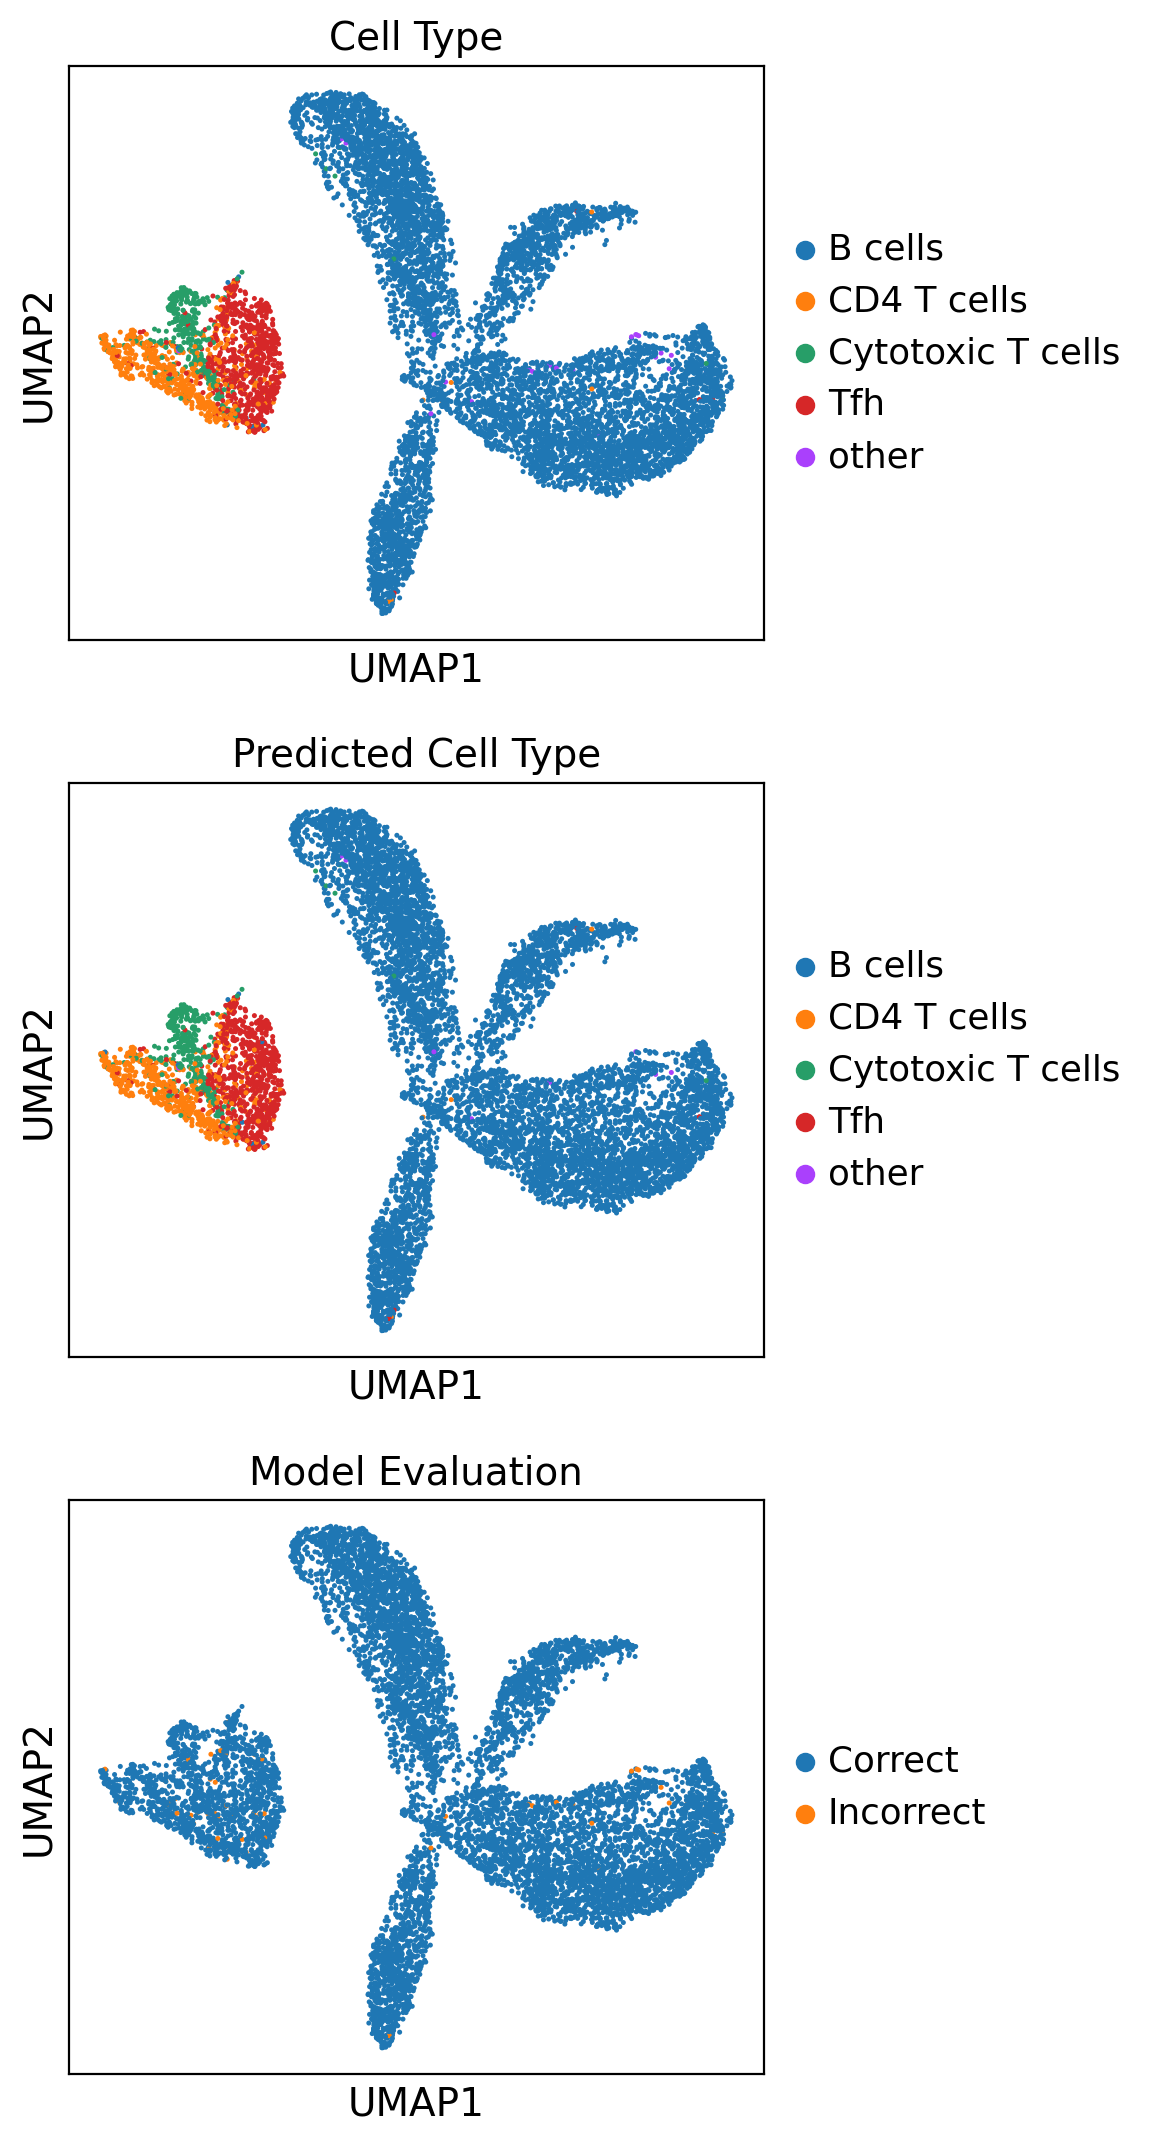

In [ ]:
sc.pl.umap(SceFollicula_adata, 
           color = ['Cell Type','Predicted Cell Type','Model Evaluation'],
           ncols=1, 
           legend_loc = 'right margin')

In [ ]:
# Compare average p-value in correct predictions vs incorrect predictions (t-test)
from scipy import stats
import statistics

stat, p_val = stats.ttest_ind(Model_Predictions['pVal'].iloc[np.where(SceFollicula_adata.obs['Model Evaluation'] == 'Correct')],
                              Model_Predictions['pVal'].iloc[np.where(SceFollicula_adata.obs['Model Evaluation'] == 'Incorrect')])
Correct_Mean_pVal = statistics.mean(Model_Predictions['pVal'].iloc[np.where(SceFollicula_adata.obs['Model Evaluation'] == 'Correct')])
Incorrect_Mean_pVal = statistics.mean(Model_Predictions['pVal'].iloc[np.where(SceFollicula_adata.obs['Model Evaluation'] == 'Incorrect')])

print('Mean Prediction Confidence in Correct Prediction = ' + str(Correct_Mean_pVal))
print('Mean Prediction Confidence in Incorrect Prediction = ' + str(Incorrect_Mean_pVal))
print('P-Value of the Statistical Difference in Average P-Value = ' + str(p_val))

KeyError: ignored

In [ ]:
MarkerGeneQuality = pd.read_csv("/content/drive/My Drive/ML for genomics project group /Data/CellAssign Data /FL_MarkerGeneQuality.csv")
MarkerGeneQuality

In [ ]:
# Linear regression analysis between marker gene quality and mean assignment confidence (p-value) 

MeanAssignmentConfidence = []

for cell in MarkerGeneQuality['cell_type']: 
        MeanAssignmentConfidence.append(
            statistics.mean(Model_Predictions['pVal'].iloc[np.where(SceFollicula_adata.obs['Predicted Cell Type'] == cell)])
        )

plt.plot(MeanAssignmentConfidence, MarkerGeneQuality['p_value'], 'o')
plt.xlabel('Avg Cell Type Assignment Confidence (P-Value)'); plt.ylabel('Marker Genes Expression P-Value')
plt.show()
Results = scipy.stats.linregress(MeanAssignmentConfidence, MarkerGeneQuality['p_value'])
print("LinReg P-Value = " + str(Results.pvalue))
print("LinReg R = " + str(Results.rvalue))
print("Correlation Coefficient = " + str(np.corrcoef(MeanAssignmentConfidence, MarkerGeneQuality['p_value'])[0][1]))

In [ ]:
#@title
pVal_ordered = []
CellType_ordered = []
Accs_ordered = []

for i in pd.unique(SceFollicula_adata.obs['Cell Type']):
  if len(np.where(MarkerGeneQuality['cell_type'] == i)[0]) > 0: 
    Accs_ordered.append(CellTypeAccs[np.where(MarkerGeneQuality['cell_type'] == i)[0][0]])
    CellType_ordered.append(i)
    pVal_ordered.append(MarkerGeneQuality.iloc[np.where(MarkerGeneQuality['cell_type'] == i)[0][0],2])

plt.plot(Accs_ordered, pVal_ordered, 'o')
plt.xlabel('% Accuracy'); plt.ylabel('Marker Genes Expression P-Value')
plt.show()
Results = scipy.stats.linregress(Accs_ordered, pVal_ordered)
print("LinReg P-Value = " + str(Results.pvalue))
print("LinReg R = " + str(Results.rvalue))
print("Correlation Coefficient = " + str(np.corrcoef(Accs_ordered, pVal_ordered)[0][1]))